In [36]:
# !pip install xgboost
!pip install catboost


In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif, VarianceThreshold, chi2, SequentialFeatureSelector, SelectFromModel
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import (classification_report, accuracy_score, confusion_matrix,
                             ConfusionMatrixDisplay, roc_auc_score, roc_curve,
                             RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay, f1_score)

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline

import xgboost as xgb
import lightgbm as lgb
from sklearn.decomposition import PCA
import shap
import catboost as cb
from statsmodels.stats.outliers_influence import variance_inflation_factor
import time


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore")


ستون هایی که امکان ارتباط با ترک سیگار دارند

In [106]:
cols = ["x_smoker3", "x_llcpwt", "stopsmk2", "smokday2", "smoke100", "lastsmk2", "x_bmi5", "x_bmi5cat", "menthlth", "physhlth",
         "poorhlth", "genhlth", "cadult", "numadult", "hhadult", "x_age_g", "x_age80", "x_exteth3",
         "x_alteth3", "x_asthms1", "x_totinda", "x_ment14d", "x_phys14d", "copdbrth", "copdcogh", "sex1", "rmvteth4",
         "x_imprace", "x_educag", "marital", "x_incomg", "x_metstat", "x_urbstat", "employ1", "x_state", "weight2",
         "persdoc2", "checkup1", "pvtresd1", "exerany2", "sleptim1", "cvdinfr4", "cvdcrhd4", "cvdstrk3",
         "asthma3", "chccopd1", "havarth3", "addepev2", "chckdny1", "diabete3", "educa", "children", "height3",
         "diffwalk", "alcday5", "pneuvac4", "profexam", "lengexam", "sofemale", "somale", "casthdx2", "x_rfhlth",
         "x_ltasth1", "x_casthm1", "x_prace1", "x_racegr3", "x_ageg5yr", "wtkg3", "x_rfsmok3"]

# news = ["hlthcvr1","primins1","priminsr","ladult1","sexvar","x_incomg1","persdoc3","chccopd2","chccopd3","havarth4","havarth5","addepev3","chckdny2", "diabete4", "alcday4", "x_mrace1", "x_mrace2", "x_racegr4"]


# codes

In [ ]:
import zipfile
import os

!gdown --id 155E3dCHUM0fazP7yS_jV7W_CyGFJiLjK
# !gdown --id 1QdtD7qctXKLLQVNvM47L2WMh_BjxZ1D9
# !gdown --id 1gTmk3uUMlpzOe6pT3qCeHuJcN-fwCYfN
# !gdown --id 1X1YoZwy-AoWo-LwdFJGkqrtikLYxGFBH
# !gdown --id 1GvRUJXPoql-22ufdE314VyK5BotH3QjF
!gdown --id 1_EKAW3PpSVbAR3cTAYO5qTg8yHnxHzKI
# !gdown --id 1NxpQ3Ukr5X7DHhb1z4jkwPN3HqBDV7-s

# path = '/content/drive/MyDrive/Colab Notebooks/'
# path = '/kaggle/working/'
path = "/content/"

zip_filenames = ['BRFSS2022.zip']

for zip_filename in zip_filenames:
    if not os.path.exists(path + zip_filename):
        print(f"not find {zip_filename}")
    else:
        try:
            with zipfile.ZipFile(path + zip_filename, 'r') as zip_ref:
                zip_ref.extractall()
            print(f"extract completed {path + zip_filename}")

        except zipfile.BadZipFile:
            print("file not find")
        except Exception as e:
            print(f"exception {e}")


/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=155E3dCHUM0fazP7yS_jV7W_CyGFJiLjK
To: /content/res v1.1.csv
100% 6.28k/6.28k [00:00<00:00, 10.9MB/s]
/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1_EKAW3PpSVbAR3cTAYO5qTg8yHnxHzKI
From (redirected): https://drive.google.com/uc?id=1_EKAW3PpSVbAR3cTAYO5qTg8yHnxHzKI&confirm=t&uuid=0ee9a72e-48b5-49db-bdea-354fe341baa7
To: /content/BRFSS2022.zip
100% 70.1M/70.1M [00:01<00:00, 40.9MB/s]
extract completed /content/BRFSS2022.zip


In [108]:
df = pd.read_stata("BRFSS2022.dta")

df = df.rename(columns={"ladult1":"cadult", "sexvar":"sex1", "priminsr":"hlthpln1", "chccopd3":"chccopd1", "havarth4":"havarth3", "addepev3":"addepev2",
                                "chckdny2":"chckdny1", "diabete4":"diabete3", "alcday4":"alcday5", "x_mrace2":"x_prace1", "x_racegr4":"x_racegr3", "x_incomg1":"x_incomg",
                                "persdoc3":"persdoc2"})
res = pd.read_csv(path + "res v1.1.csv", index_col="Unnamed: 0")
res


,2018,2019,2020,2021,2022,2023
x_smoker3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
x_llcpwt,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
stopsmk2,0.860560,0.865789,0.870096,0.945413,0.957801,0.952373
smokday2,0.587787,0.597208,0.610322,0.618291,0.631451,0.633901
smoke100,0.037505,0.044323,0.051431,0.055759,0.078539,0.052081
...,...,...,...,...,...,...
x_prace1,0.000073,0.000053,0.000022,0.000009,0.000025,0.000586
x_racegr3,0.000002,0.000007,0.000002,0.000000,0.000004,0.000198
x_ageg5yr,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
wtkg3,0.065317,0.071122,0.086944,0.092520,0.094529,0.078812


In [109]:
replacement_dict = {
    'x_smoker3' : [9],
    'weight2': [7777, 9999],
    'height3': [7777, 9999],
    'children': [99],
    'hhadult': [77, 99],
    'alcday5': [777, 999],
    'menthlth': [77, 99],
    'physhlth': [77, 99],
    'poorhlth': [77, 99],
    'smoke100': [7, 9],
    'genhlth': [7, 9],
    '_smoker3': [9],
    'stopsmk2': [7, 9, 77, 99],
    '_asthms1': [9],
    '_ltasth1': [9],
    '_casthm1': [9],
    '_totinda': [9],
    'exerany2': [7, 9],
    '_ment14d': [9],
    '_phys14d': [9],
    '_prace1': [77, 99],
    'educa': [9],
    '_educag': [9],
    'marital': [9],
    'incomg2': [77, 99],
    '_incomg': [9],
    'employ1': [9],
    'persdoc2': [7, 9],
    'checkup1': [7, 9],
    'cvdinfr4': [7, 9],
    'cvdcrhd4': [7, 9],
    'cvdstrk3': [7, 9],
    'asthma3': [7, 9],
    'chccopd1': [7, 9],
    'havarth3': [7, 9],
    'addepev2': [7, 9],
    'chckdny1': [7, 9],
    'diabete3': [7, 9],
    'diffwalk': [7, 9],
    'pneuvac4': [7, 9],
    '_rfhlth': [9],
    '_rfsmok3': [9]
}


cols_in_df = [col for col in replacement_dict.keys() if col in df.columns]
for col in cols_in_df:
    df[col] = df[col].replace(replacement_dict[col], np.nan)


In [110]:
print(df.shape)
df.dropna(subset=["x_smoker3"],inplace=True)
df.shape


(445132, 328)


(409670, 328)

In [111]:
res_na = res[res<=0.5].dropna(axis=0)
res_na.index


Index(['x_smoker3', 'x_llcpwt', 'smoke100', 'x_bmi5', 'x_bmi5cat', 'menthlth',
       'physhlth', 'genhlth', 'hhadult', 'x_age_g', 'x_age80', 'x_asthms1',
       'x_totinda', 'x_ment14d', 'x_phys14d', 'sex1', 'x_imprace', 'x_educag',
       'marital', 'x_incomg', 'x_metstat', 'x_urbstat', 'employ1', 'x_state',
       'weight2', 'persdoc2', 'checkup1', 'exerany2', 'cvdinfr4', 'cvdcrhd4',
       'cvdstrk3', 'asthma3', 'chccopd1', 'havarth3', 'addepev2', 'chckdny1',
       'diabete3', 'educa', 'children', 'height3', 'diffwalk', 'alcday5',
       'pneuvac4', 'x_rfhlth', 'x_ltasth1', 'x_casthm1', 'x_prace1',
       'x_racegr3', 'x_ageg5yr', 'wtkg3', 'x_rfsmok3'],
      dtype='object')

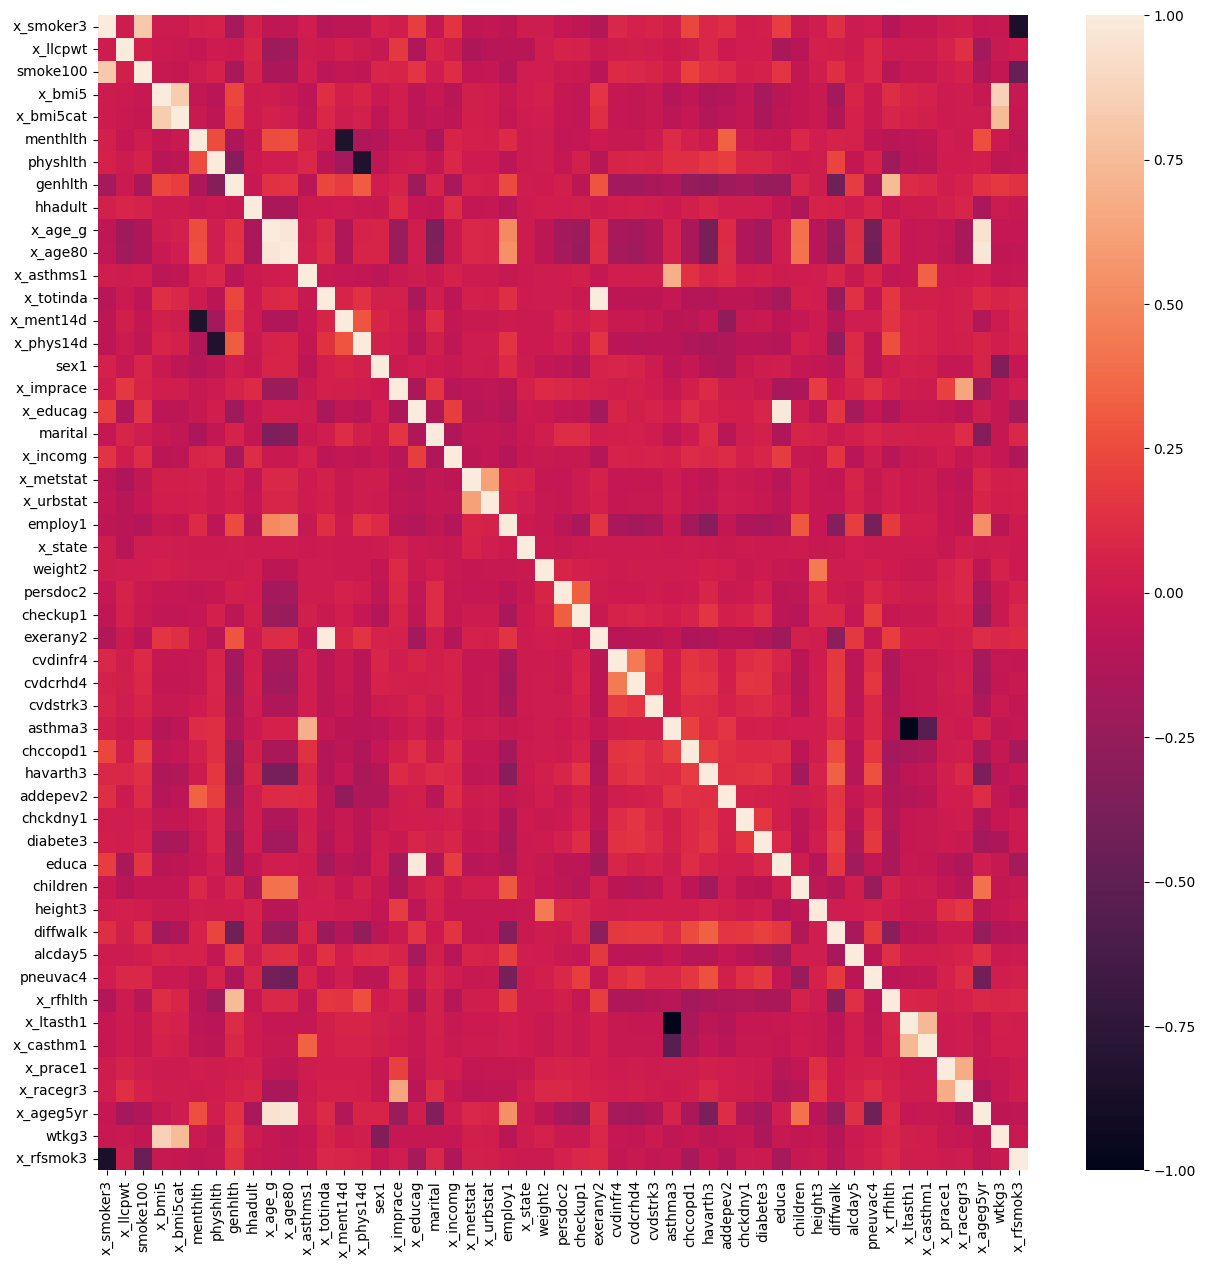

In [112]:
correlation = df[res_na.index].corr()

plt.figure(figsize=(15,15))
sns.heatmap(df[res_na.index].corr())
plt.show()


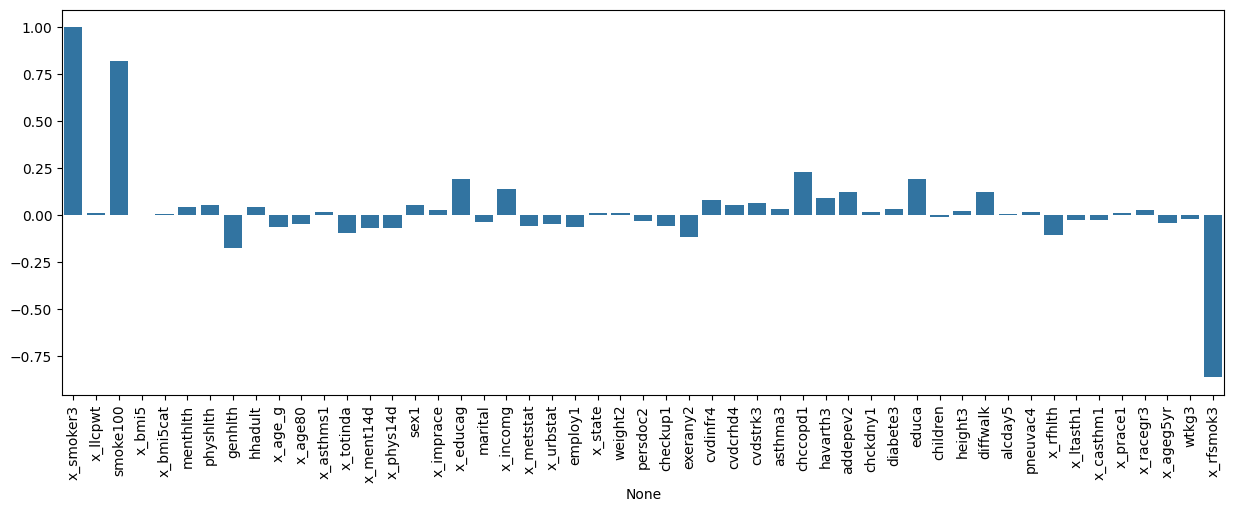

In [113]:
plt.figure(figsize=(15,5))
sns.barplot(y=correlation.x_smoker3.values, x=correlation.x_smoker3.index)
plt.xticks(rotation=90)
plt.show()


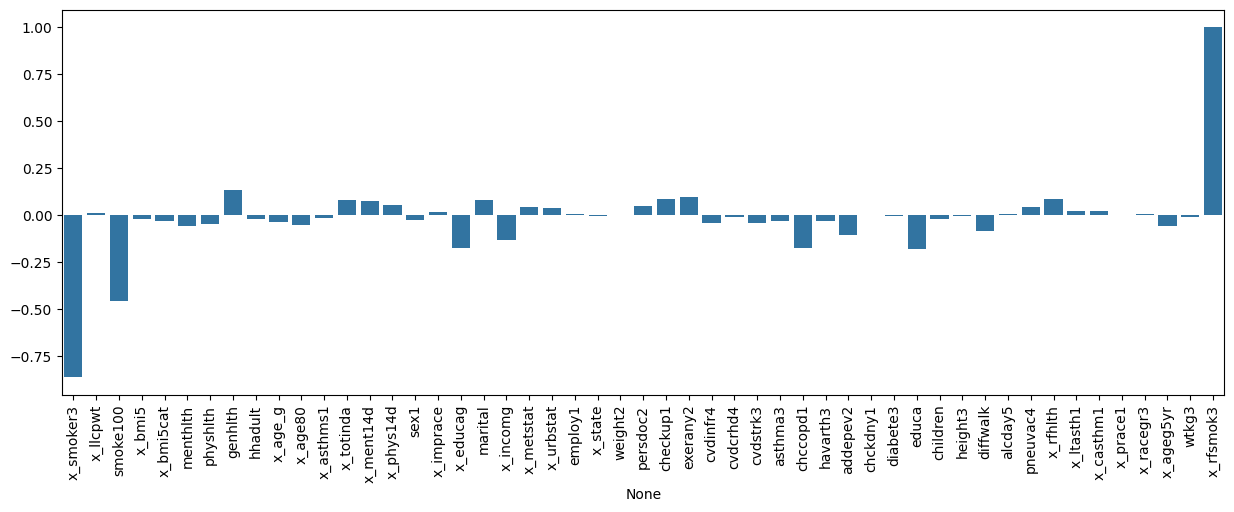

In [114]:
plt.figure(figsize=(15,5))
sns.barplot(y=correlation.x_rfsmok3.values, x=correlation.x_rfsmok3.index)
plt.xticks(rotation=90)
plt.show()


In [115]:
# from res_na

numerical_features = [
    'x_llcpwt','x_age80','x_bmi5','weight2','wtkg3','height3',
    'children','hhadult','alcday5','menthlth','physhlth','poorhlth'
]

categorical_features = [
    'smoke100','x_bmi5cat','genhlth','x_age_g','x_asthms1','x_ltasth1','x_casthm1',
    'x_totinda','exerany2','x_ment14d','x_phys14d','sex1','x_imprace','x_prace1','x_racegr3',
    'x_educag','educa','marital','x_incomg','x_metstat','x_urbstat','employ1','x_state',
    'persdoc2','checkup1','cvdinfr4','cvdcrhd4','cvdstrk3','asthma3','chccopd1','havarth3','addepev2',
    'chckdny1','diabete3','diffwalk','pneuvac4','x_rfhlth','x_rfsmok3','x_ageg5yr'
]

len(numerical_features+categorical_features)


51

In [116]:
categorical_features.remove("smoke100")
categorical_features.remove("x_rfsmok3")
numerical_features.remove("x_llcpwt")

len(numerical_features+categorical_features)


48

In [117]:
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),                # پر کردن مقادیر گمشده عددی با میانگین
    ('scaler', StandardScaler())                                # مقیاس‌بندی ویژگی‌های عددی
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),       # پر کردن مقادیر گمشده متنی/منطقی با مد (پرتکرارترین)
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ],
    remainder='passthrough'
)


In [118]:
df2018_without_4_smoker3 = df.copy()

df2018_without_4_smoker3['x_smoker3'].replace(4, np.nan, inplace=True)

df2018_without_4_smoker3.dropna(subset=['x_smoker3'], inplace=True)

df2018_without_4_smoker3['x_smoker3'] = df2018_without_4_smoker3['x_smoker3'].astype(int)
mapping_dict = {
    1: 0,
    2: 0,
    3: 1
}
df2018_without_4_smoker3['x_smoker3'] = df2018_without_4_smoker3['x_smoker3'].map(mapping_dict)

df2018_without_4_smoker3['x_smoker3'].value_counts()


,count
x_smoker3,
1,113774
0,49941


In [119]:
X = df2018_without_4_smoker3[numerical_features+categorical_features]
y = df2018_without_4_smoker3["x_smoker3"]


In [120]:
scale_pos_weight = y.value_counts()[0] / y.value_counts()[1]
scale_pos_weight


np.float64(0.4389491447958233)

In [121]:
X_processed = preprocessor.fit_transform(X)
print(f"\nShape of data after preprocessing: {X_processed.shape}")

feature_names_processed = preprocessor.get_feature_names_out()
print(f"Number of features after preprocessing: {len(feature_names_processed)}")

feature_names_processed



Shape of data after preprocessing: (163715, 48)
Number of features after preprocessing: 48


array(['num__x_age80', 'num__x_bmi5', 'num__weight2', 'num__wtkg3',
       'num__height3', 'num__children', 'num__hhadult', 'num__alcday5',
       'num__menthlth', 'num__physhlth', 'num__poorhlth',
       'cat__x_bmi5cat', 'cat__genhlth', 'cat__x_age_g', 'cat__x_asthms1',
       'cat__x_ltasth1', 'cat__x_casthm1', 'cat__x_totinda',
       'cat__exerany2', 'cat__x_ment14d', 'cat__x_phys14d', 'cat__sex1',
       'cat__x_imprace', 'cat__x_prace1', 'cat__x_racegr3',
       'cat__x_educag', 'cat__educa', 'cat__marital', 'cat__x_incomg',
       'cat__x_metstat', 'cat__x_urbstat', 'cat__employ1', 'cat__x_state',
       'cat__persdoc2', 'cat__checkup1', 'cat__cvdinfr4', 'cat__cvdcrhd4',
       'cat__cvdstrk3', 'cat__asthma3', 'cat__chccopd1', 'cat__havarth3',
       'cat__addepev2', 'cat__chckdny1', 'cat__diabete3', 'cat__diffwalk',
       'cat__pneuvac4', 'cat__x_rfhlth', 'cat__x_ageg5yr'], dtype=object)

In [122]:
X_processed_df = pd.DataFrame(X_processed, columns=numerical_features+categorical_features)


In [123]:
weights = df2018_without_4_smoker3["x_llcpwt"]


## Feature Engineering

In [124]:
# Define the full pipeline for preprocessing + feature selection
k=30
feature_selection_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('selector', SelectKBest(score_func=f_classif, k=k))       # Select top K best features
])

feature_selection_pipeline.fit(X, y)

# Get the scores for each feature
feature_scores = feature_selection_pipeline.named_steps['selector'].scores_

numerical_feature_names = numerical_features
# Get one-hot encoded feature names
onehot_features = feature_selection_pipeline.named_steps['preprocessor'].named_transformers_['cat']
categorical_feature_names_onehot = onehot_features.get_feature_names_out(categorical_features)

# Combine all processed feature names
all_processed_feature_names = list(numerical_feature_names) + list(categorical_feature_names_onehot)

feature_scores_series = pd.Series(feature_scores, index=all_processed_feature_names)
sorted_features = feature_scores_series.sort_values(ascending=False)
selected_features_names = sorted_features.head(feature_selection_pipeline.named_steps['selector'].k).index.tolist()

print(f"Method used for Feature Selection: SelectKBest with f_classif (selecting top {feature_selection_pipeline.named_steps['selector'].k} features)")
print("\nTop features based on f_classif score:")
print(sorted_features.head(30))

print(f"\nSelected {feature_selection_pipeline.named_steps['selector'].k} Features:")
print(selected_features_names)


Method used for Feature Selection: SelectKBest with f_classif (selecting top 30 features)

Top features based on f_classif score:
x_age80      9318.752234
x_ageg5yr    9220.939276
x_age_g      7354.999511
educa        6290.270832
x_educag     5834.044305
marital      4745.084105
x_incomg     3285.513760
checkup1     3034.762423
pneuvac4     2933.004037
genhlth      1992.427619
chccopd1     1790.988900
addepev2     1556.204260
exerany2     1474.517487
x_ment14d    1433.477320
menthlth     1405.452384
x_imprace    1216.743009
employ1      1024.251787
persdoc2     1010.531150
x_totinda     998.330073
children      963.050238
x_bmi5cat     782.555423
x_rfhlth      765.211591
x_racegr3     536.346235
wtkg3         513.186751
x_bmi5        447.934572
havarth3      395.251078
diffwalk      363.144519
x_phys14d     353.015806
physhlth      287.725193
cvdcrhd4      286.877442
dtype: float64

Selected 30 Features:
['x_age80', 'x_ageg5yr', 'x_age_g', 'educa', 'x_educag', 'marital', 'x_incomg', 'c

Method 2: Recursive Feature Elimination (RFE)

In [125]:
# Initialize RFE. Select a base estimator and specify the number of features to select.
rfe_selector = RFE(estimator=LogisticRegression(random_state=42, max_iter=200), n_features_to_select=7)

# Fit RFE on the processed data (X_processed) and the target (y)
rfe_selector.fit(X_processed, y)

# Get the boolean mask of selected features and their ranking
selected_features_mask_rfe = rfe_selector.support_
feature_ranking_rfe = rfe_selector.ranking_

# Get the names of the selected features based on the mask
selected_features_names_rfe = feature_names_processed[selected_features_mask_rfe].tolist()

print("Selected features by RFE:")
print(selected_features_names_rfe)


Selected features by RFE:
['num__x_age80', 'cat__x_bmi5cat', 'cat__x_age_g', 'cat__exerany2', 'cat__educa', 'cat__cvdstrk3', 'cat__chccopd1']


Method 3: Feature Importance from RandomForestClassifier

In [126]:
rf_model_for_importance = RandomForestClassifier(n_estimators=200, random_state=42)

# Fit the model on the processed data (X_processed) and the target (y)
rf_model_for_importance.fit(X_processed, y, sample_weight=weights)

# Get the feature importances from the fitted model
feature_importances_rf = rf_model_for_importance.feature_importances_

feature_importances_series_rf = pd.Series(feature_importances_rf, index=feature_names_processed)
sorted_feature_importances_rf = feature_importances_series_rf.sort_values(ascending=False)

print("Top features based on RandomForest feature importance:")
print(sorted_feature_importances_rf.head(20))

top_k_features_names_rf = sorted_feature_importances_rf.head(20).index.tolist()

print(f"\nTop 20 feature names selected by RandomForest importance:")
print(top_k_features_names_rf)


Top features based on RandomForest feature importance:
num__x_age80      0.067886
num__x_bmi5       0.066240
cat__x_state      0.055180
num__weight2      0.052320
num__wtkg3        0.052106
num__height3      0.046518
cat__x_ageg5yr    0.043987
cat__x_incomg     0.041397
num__alcday5      0.036974
cat__marital      0.033649
num__hhadult      0.027642
num__poorhlth     0.026286
num__menthlth     0.025886
cat__x_age_g      0.025036
num__physhlth     0.024257
cat__genhlth      0.023826
cat__educa        0.023521
cat__employ1      0.023112
cat__x_educag     0.022981
cat__checkup1     0.019426
dtype: float64

Top 20 feature names selected by RandomForest importance:
['num__x_age80', 'num__x_bmi5', 'cat__x_state', 'num__weight2', 'num__wtkg3', 'num__height3', 'cat__x_ageg5yr', 'cat__x_incomg', 'num__alcday5', 'cat__marital', 'num__hhadult', 'num__poorhlth', 'num__menthlth', 'cat__x_age_g', 'num__physhlth', 'cat__genhlth', 'cat__educa', 'cat__employ1', 'cat__x_educag', 'cat__checkup1']


In [127]:
sorted_feature_importances_rf


,0
num__x_age80,0.067886
num__x_bmi5,0.066240
cat__x_state,0.055180
num__weight2,0.052320
num__wtkg3,0.052106
num__height3,0.046518
cat__x_ageg5yr,0.043987
cat__x_incomg,0.041397
num__alcday5,0.036974
cat__marital,0.033649


Variance Threshold

In [128]:
selector_vt = VarianceThreshold(threshold=0.5)

selected_features_mask_vt = selector_vt.fit(X_processed).get_support()
selected_features_names_vt = feature_names_processed[selected_features_mask_vt].tolist()

print(f"تعداد ویژگی‌های انتخاب شده توسط Variance Threshold: {len(selected_features_names_vt)}")
print("ویژگی‌های انتخاب شده:")
print(selected_features_names_vt)


تعداد ویژگی‌های انتخاب شده توسط Variance Threshold: 30
ویژگی‌های انتخاب شده:
['num__x_age80', 'num__x_bmi5', 'num__weight2', 'num__wtkg3', 'num__height3', 'num__children', 'num__hhadult', 'num__alcday5', 'num__menthlth', 'num__physhlth', 'num__poorhlth', 'cat__x_bmi5cat', 'cat__genhlth', 'cat__x_age_g', 'cat__x_asthms1', 'cat__x_casthm1', 'cat__x_ment14d', 'cat__x_phys14d', 'cat__x_imprace', 'cat__x_prace1', 'cat__x_racegr3', 'cat__x_educag', 'cat__educa', 'cat__marital', 'cat__x_incomg', 'cat__employ1', 'cat__x_state', 'cat__checkup1', 'cat__diabete3', 'cat__x_ageg5yr']


۲. Correlation Matrix (ماتریس همبستگی)
این روش برای کاهش همخطی چندگانه (Multicollinearity) استفاده می‌شود. ویژگی‌هایی که همبستگی بسیار بالایی با یکدیگر دارند را شناسایی و یکی از آن‌ها را حذف می‌کند. این کار به پایداری و تفسیرپذیری مدل‌های خطی کمک می‌کند.

In [129]:
# محاسبه ماتریس همبستگی. abs() برای در نظر گرفتن همبستگی مثبت و منفی.
corr_matrix = X_processed_df.corr().abs()

# انتخاب مثلث بالایی ماتریس همبستگی برای جلوگیری از تکرار و مقادیر روی قطر اصلی
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# 0.9 یک آستانه رایج است، می‌توانید آن را تغییر دهید.
to_drop_high_corr = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]

# ویژگی‌های باقی‌مانده (انتخاب‌شده)
selected_features_names_corr = [col for col in feature_names_processed if col not in to_drop_high_corr]

print(f"ویژگی‌های حذف شده به دلیل همبستگی بالا (>0.9): {to_drop_high_corr}")
print(f"تعداد ویژگی‌های انتخاب شده بعد از حذف همبستگی بالا: {len(selected_features_names_corr)}")
print("ویژگی‌های انتخاب شده:")
print(selected_features_names_corr)


ویژگی‌های حذف شده به دلیل همبستگی بالا (>0.9): ['x_age_g', 'educa', 'x_ageg5yr']
تعداد ویژگی‌های انتخاب شده بعد از حذف همبستگی بالا: 48
ویژگی‌های انتخاب شده:
['num__x_age80', 'num__x_bmi5', 'num__weight2', 'num__wtkg3', 'num__height3', 'num__children', 'num__hhadult', 'num__alcday5', 'num__menthlth', 'num__physhlth', 'num__poorhlth', 'cat__x_bmi5cat', 'cat__genhlth', 'cat__x_age_g', 'cat__x_asthms1', 'cat__x_ltasth1', 'cat__x_casthm1', 'cat__x_totinda', 'cat__exerany2', 'cat__x_ment14d', 'cat__x_phys14d', 'cat__sex1', 'cat__x_imprace', 'cat__x_prace1', 'cat__x_racegr3', 'cat__x_educag', 'cat__educa', 'cat__marital', 'cat__x_incomg', 'cat__x_metstat', 'cat__x_urbstat', 'cat__employ1', 'cat__x_state', 'cat__persdoc2', 'cat__checkup1', 'cat__cvdinfr4', 'cat__cvdcrhd4', 'cat__cvdstrk3', 'cat__asthma3', 'cat__chccopd1', 'cat__havarth3', 'cat__addepev2', 'cat__chckdny1', 'cat__diabete3', 'cat__diffwalk', 'cat__pneuvac4', 'cat__x_rfhlth', 'cat__x_ageg5yr']


### VIF Method

In [62]:
# def calculate_vif(df_features):
#     variables = df_features.copy()
#     threshold = 5.0

#     while True:
#         vif_df = pd.DataFrame()
#         vif_df["Feature"] = variables.columns

#         vif_df["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
#         max_vif = vif_df["VIF"].max()

#         if max_vif > threshold:
#             feature_with_max_vif = vif_df.sort_values(by="VIF", ascending=False).iloc[0]["Feature"]
#             print(f"remove feature'{feature_with_max_vif}' with VIF = {max_vif:.2f}")

#             variables = variables.drop(columns=[feature_with_max_vif])
#         else:
#             print(f"can't find any feature with vif bigger than {threshold}")
#             break

#     print("\n End of vif removing features process")
#     print(vif_df.sort_values(by="VIF", ascending=False))
#     return variables.columns.tolist()

# selected_features_vif = calculate_vif(X_processed_df)
# print(f"\nselected features with VIF method:")
# print(selected_features_vif)
# X_vif_selected = X_processed_df[selected_features_vif]


In [130]:
vif_less_than_7 = ['x_age80', 'x_bmi5', 'weight2', 'wtkg3', 'height3', 'children', 'hhadult', 'alcday5', 'menthlth', 'physhlth', 'poorhlth', 'x_casthm1', 'x_totinda', 'x_ment14d', 'x_phys14d', 'x_imprace', 'x_prace1', 'marital', 'x_incomg', 'employ1', 'x_state', 'persdoc2', 'checkup1', 'x_rfhlth']
X_processed_df_vif = X_processed_df[vif_less_than_7]
X_processed_df_vif.shape


(163715, 24)

In [131]:
numerical_features_selected = [f for f in vif_less_than_7 if f in numerical_features]
categorical_features_selected = [f for f in vif_less_than_7 if f in categorical_features]

preprocessor_vif = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features_selected),
        ('cat', categorical_pipeline, categorical_features_selected)
    ],
    remainder='passthrough'
)

X_vif = df2018_without_4_smoker3[vif_less_than_7]


مدل‌های مبتنی بر درخت مانند Random Forest، XGBoost و LightGBM به هم‌خطی (Multicollinearity) حساسیت بسیار کمی دارند.

#### منحنی Precision-Recall

برای داده‌های نامتوازن، این نمودار اغلب آموزنده‌تر از ROC است، چون بر عملکرد مدل روی کلاس اقلیت (در اینجا، سیگاری‌های سابق) تمرکز می‌کند.

Precision: از بین تمام کسانی که مدل گفته "ترک کرده‌اند"، چند درصدشان واقعاً ترک کرده بودند؟

Recall: از بین تمام کسانی که واقعاً ترک کرده‌اند، مدل توانسته چند درصدشان را شناسایی کند؟

#### منحنی AUC-ROC

این منحنی، نرخ True Positive Rate (Recall) را در مقابل نرخ False Positive Rate در آستانه‌های مختلف طبقه‌بندی رسم می‌کند.

عملکرد ایده‌آل: منحنی‌ای که به گوشه بالا-چپ نزدیک‌تر است.

مقدار AUC: سطح زیر این منحنی. عددی بین ۰.۵ (مدل تصادفی) و ۱.۰ (مدل کامل). هر چه به ۱ نزدیک‌تر باشد، بهتر است.

# White/Black box models on VIF/ALL features

In [132]:
def run_full_analysis(model_name, model_constructor_func, preprocessor_instance, X_data, y_data, weights_data):
    model_instance = model_constructor_func()

    # split data
    le = LabelEncoder()
    y_encoded = le.fit_transform(y_data)
    target_names_original = le.inverse_transform(np.unique(y_encoded)).astype(str)
    X_train, X_test, y_train, y_test, weights_train, weights_test = train_test_split(
        X_data, y_encoded, weights_data, test_size=0.2, random_state=42, stratify=y_encoded
    )

    # pipline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor_instance),
        ('classifier', model_instance)
    ])

    print(f"\n===== Training model: {model_name} =====")
    start_time = time.time()
    if isinstance(model_instance, LDA):
        print("Model is LDA, fitting without sample_weight.")
        pipeline.fit(X_train, y_train)
    else:
        # other model train with weights
        pipeline.fit(X_train, y_train, classifier__sample_weight=weights_train)
    training_time = time.time() - start_time


    # evaluate
    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    auc = roc_auc_score(y_test, y_proba)

    print(f"Training completed in {training_time:.2f} seconds.")
    print(f"Accuracy: {accuracy:.4f} | F1-Score: {f1:.4f} | AUC: {auc:.4f}")


    # Evaluation plots
    fig, axes = plt.subplots(1, 3, figsize=(21, 5))
    fig.suptitle(f"Evaluation for {model_name}", fontsize=16)
    ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test, ax=axes[0], cmap=plt.cm.Blues)
    RocCurveDisplay.from_estimator(pipeline, X_test, y_test, ax=axes[1])
    PrecisionRecallDisplay.from_estimator(pipeline, X_test, y_test, ax=axes[2])
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


    # analysis for each model
    fitted_preprocessor = pipeline.named_steps['preprocessor']
    final_model = pipeline.named_steps['classifier']
    feature_names = fitted_preprocessor.get_feature_names_out()

    if isinstance(final_model, (LogisticRegression, LDA)):
        print("\n--- Coefficient Analysis ---")
        coefficients = final_model.coef_[0]
        feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
        if isinstance(final_model, LogisticRegression):
            feature_importance['Odds_Ratio'] = np.exp(coefficients)

        # sort by abs of coeff
        feature_importance['Abs_Coefficient'] = np.abs(feature_importance['Coefficient'])
        print(feature_importance.sort_values(by='Abs_Coefficient', ascending=False).drop(columns='Abs_Coefficient'))

    elif isinstance(final_model, DecisionTreeClassifier):
        print("\n--- Decision Tree Analysis ---")
        plt.figure(figsize=(40, 20))
        plot_tree(final_model, feature_names=feature_names, class_names=target_names_original,
                  filled=True, rounded=True, fontsize=7, max_depth=5)
        plt.title(f"Decision Tree for {model_name}")
        plt.show()

        # show tree conditions in text
        tree_rules = export_text(final_model, feature_names=list(feature_names))
        print("Tree Rules (first few levels):\n", "\n".join(tree_rules.splitlines()[:20]))

    elif isinstance(final_model, (xgb.XGBClassifier, lgb.LGBMClassifier, cb.CatBoostClassifier)):
        print(f"\n--- SHAP Analysis for {model_name} ---")
        X_test_transformed = fitted_preprocessor.transform(X_test)
        X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=feature_names)
        explainer = shap.TreeExplainer(final_model)
        shap_values = explainer.shap_values(X_test_transformed_df)

        shap.summary_plot(shap_values, X_test_transformed_df, show=False)
        plt.title(f'SHAP Summary Plot - {model_name}')
        plt.show()

    return {'Model': model_name, 'Accuracy': accuracy, 'F1-Score': f1, 'AUC': auc, 'Time (s)': training_time}

# models
models_to_run_full_suite = {
    # Boosting Models
    'XGBoost': lambda: xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', scale_pos_weight=scale_pos_weight, random_state=42),
    'LightGBM': lambda: lgb.LGBMClassifier(objective='binary', scale_pos_weight=scale_pos_weight, random_state=42),
    'CatBoost': lambda: cb.CatBoostClassifier(scale_pos_weight=scale_pos_weight, random_state=42, verbose=0),

    # Classic & Interpretable Models
    'Logistic Regression': lambda: LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': lambda: DecisionTreeClassifier(max_depth=7, random_state=42, min_samples_split=20, min_samples_leaf=10),
    'LDA': lambda: LDA()
}

# store results
vif_results = []
all_features_results = []



Analysis with VIF Selected Features

===== Training model: XGBoost (VIF) =====
Training completed in 3.05 seconds.
Accuracy: 0.6773 | F1-Score: 0.6886 | AUC: 0.7372


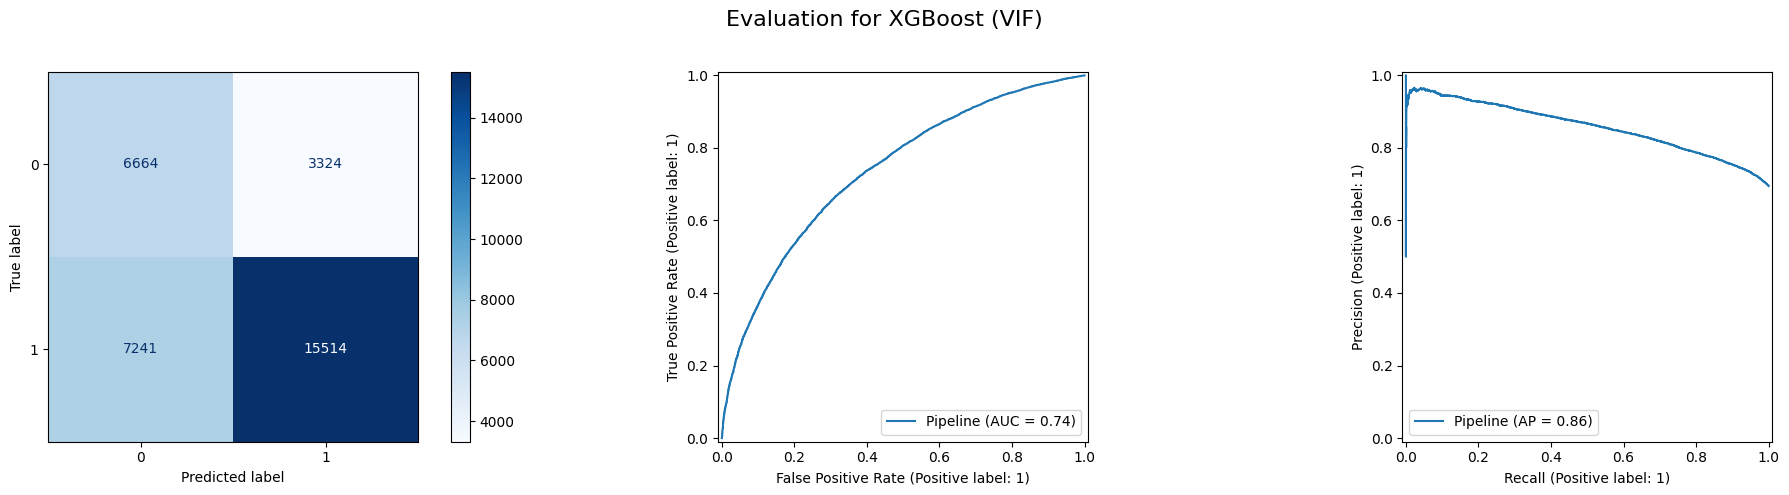


--- SHAP Analysis for XGBoost (VIF) ---


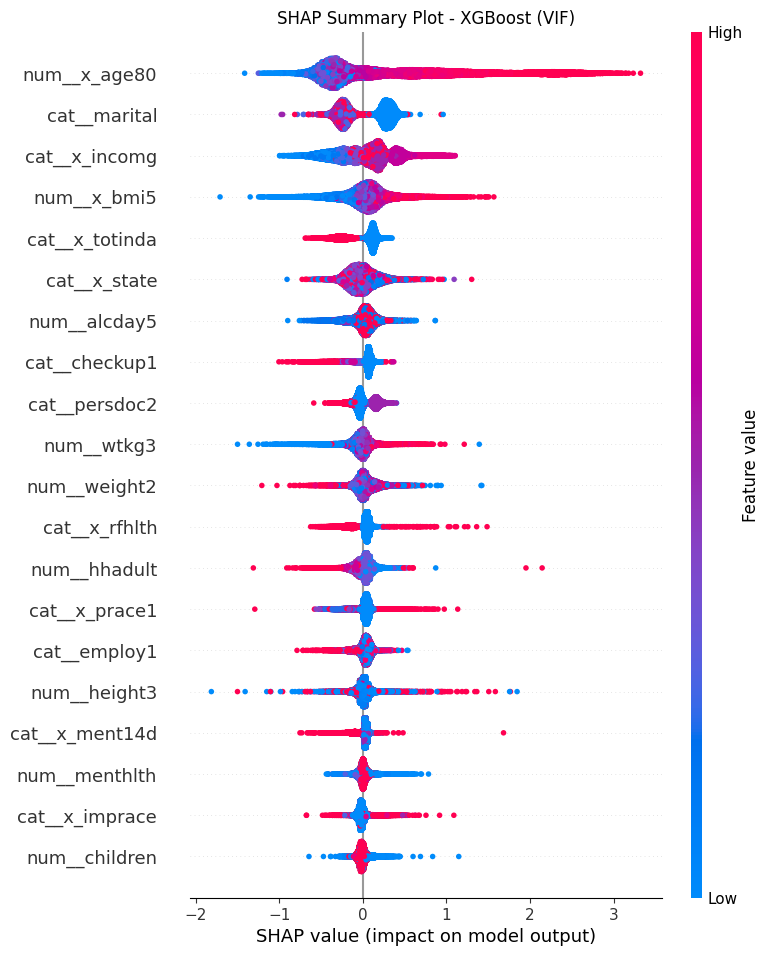


===== Training model: LightGBM (VIF) =====
[LightGBM] [Info] Number of positive: 91019, number of negative: 39953
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024239 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1227
[LightGBM] [Info] Number of data points in the train set: 130972, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.654547 -> initscore=0.639088
[LightGBM] [Info] Start training from score 0.639088
Training completed in 2.28 seconds.
Accuracy: 0.6762 | F1-Score: 0.6886 | AUC: 0.7521


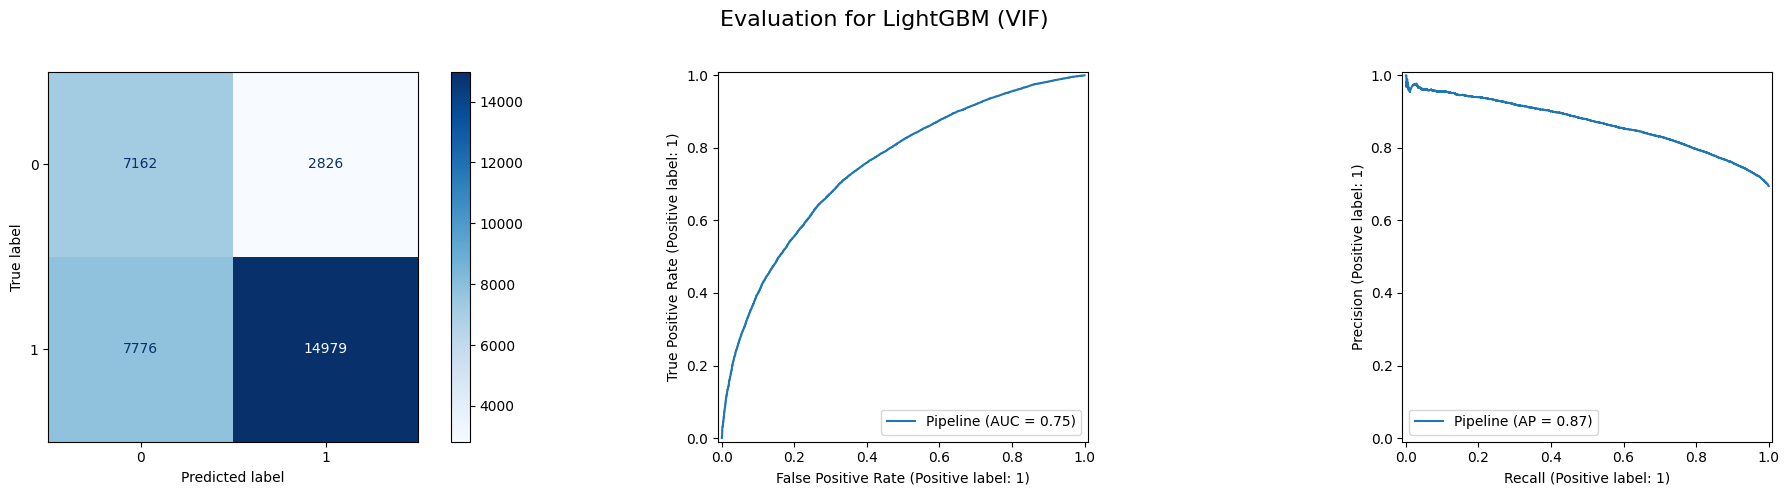


--- SHAP Analysis for LightGBM (VIF) ---


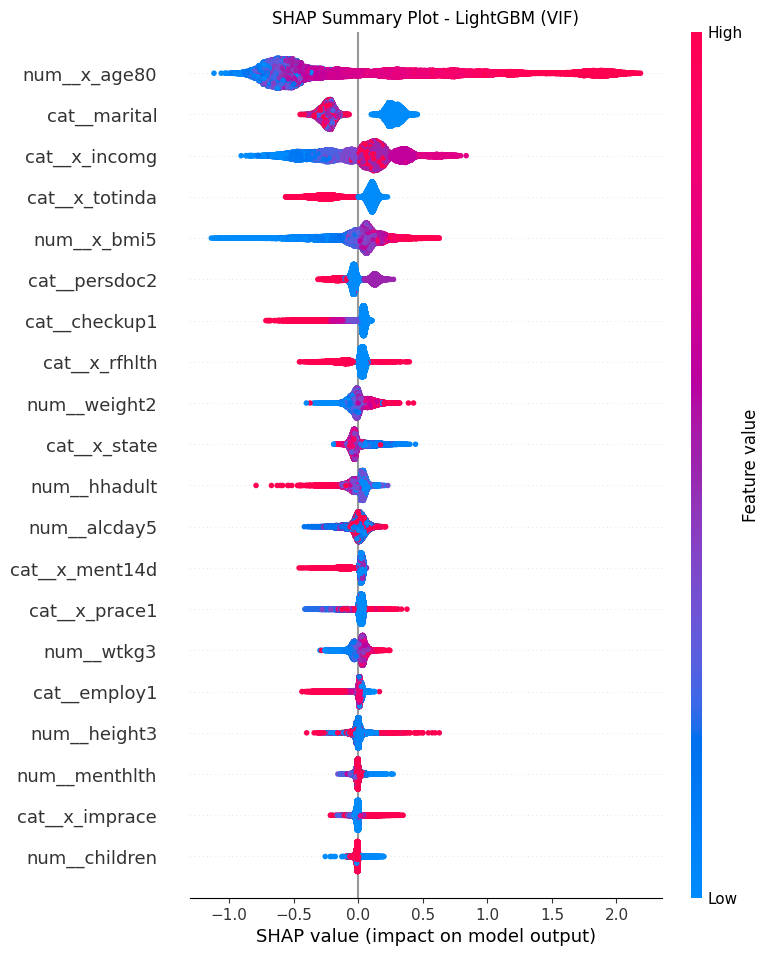


===== Training model: CatBoost (VIF) =====
Training completed in 41.56 seconds.
Accuracy: 0.6840 | F1-Score: 0.6954 | AUC: 0.7499


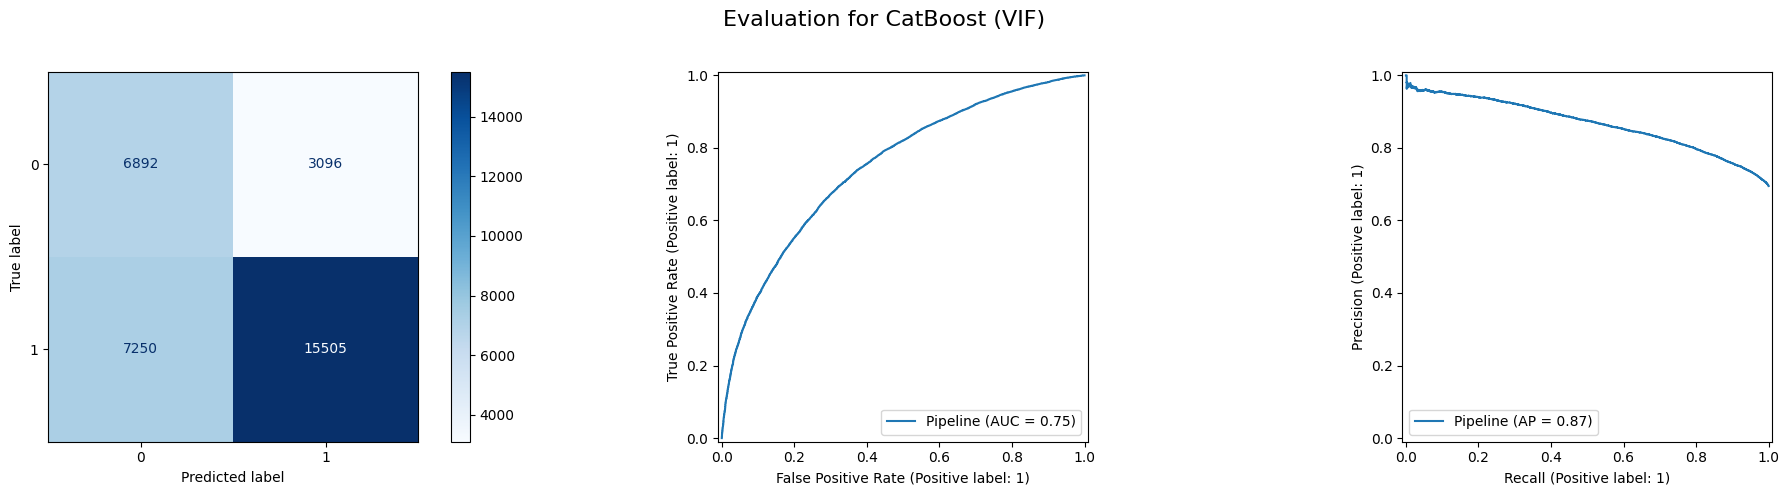


--- SHAP Analysis for CatBoost (VIF) ---


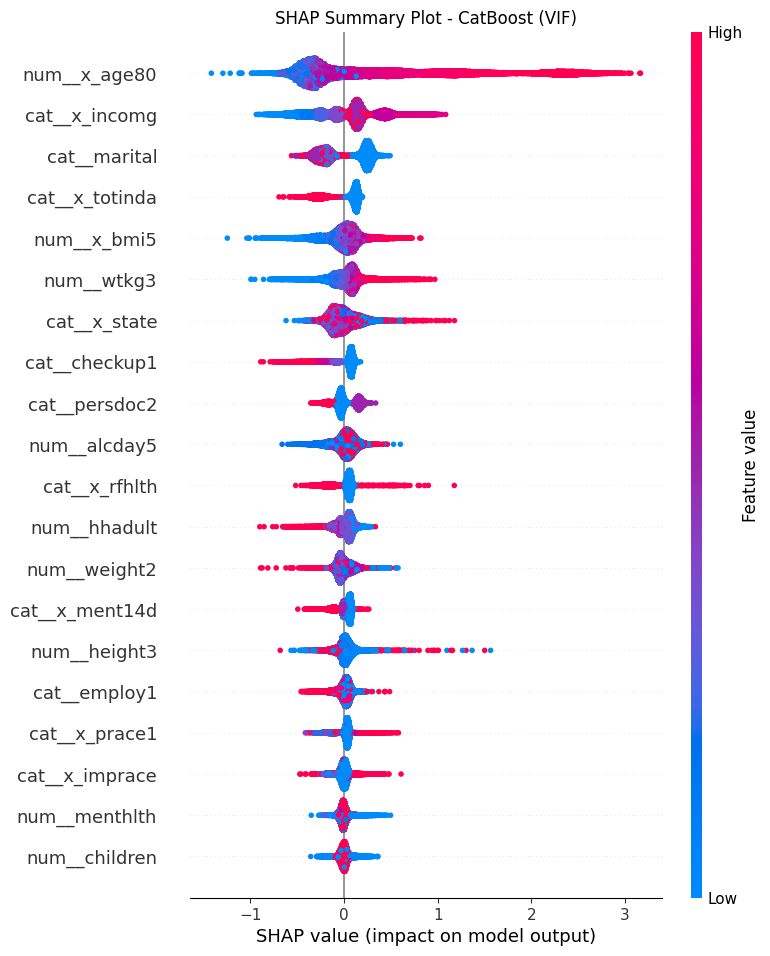


===== Training model: Logistic Regression (VIF) =====
Training completed in 8.71 seconds.
Accuracy: 0.7097 | F1-Score: 0.6615 | AUC: 0.7084


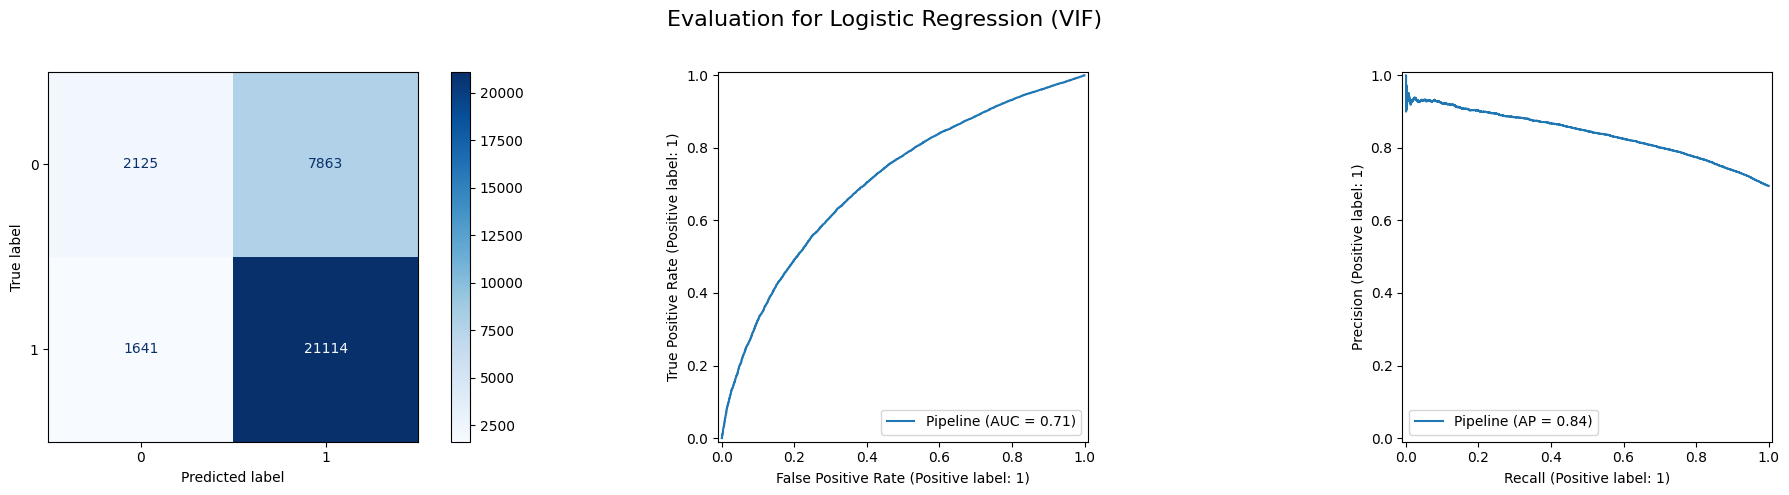


--- Coefficient Analysis ---
           Feature  Coefficient  Odds_Ratio
0     num__x_age80     0.437800    1.549294
12  cat__x_totinda    -0.299572    0.741136
22   cat__checkup1    -0.156290    0.855311
23   cat__x_rfhlth    -0.140618    0.868821
18   cat__x_incomg     0.104053    1.109659
17    cat__marital    -0.099107    0.905646
1      num__x_bmi5     0.082924    1.086459
3       num__wtkg3     0.078868    1.082061
6     num__hhadult    -0.059790    0.941962
13  cat__x_ment14d    -0.049563    0.951645
11  cat__x_casthm1    -0.041199    0.959638
5    num__children    -0.037741    0.962962
10   num__poorhlth     0.029921    1.030373
14  cat__x_phys14d    -0.027028    0.973334
19    cat__employ1    -0.022121    0.978121
4     num__height3     0.017242    1.017392
8    num__menthlth     0.016886    1.017029
7     num__alcday5    -0.015603    0.984518
21   cat__persdoc2     0.013304    1.013393
15  cat__x_imprace    -0.009821    0.990227
2     num__weight2    -0.007869    0.992161
9 

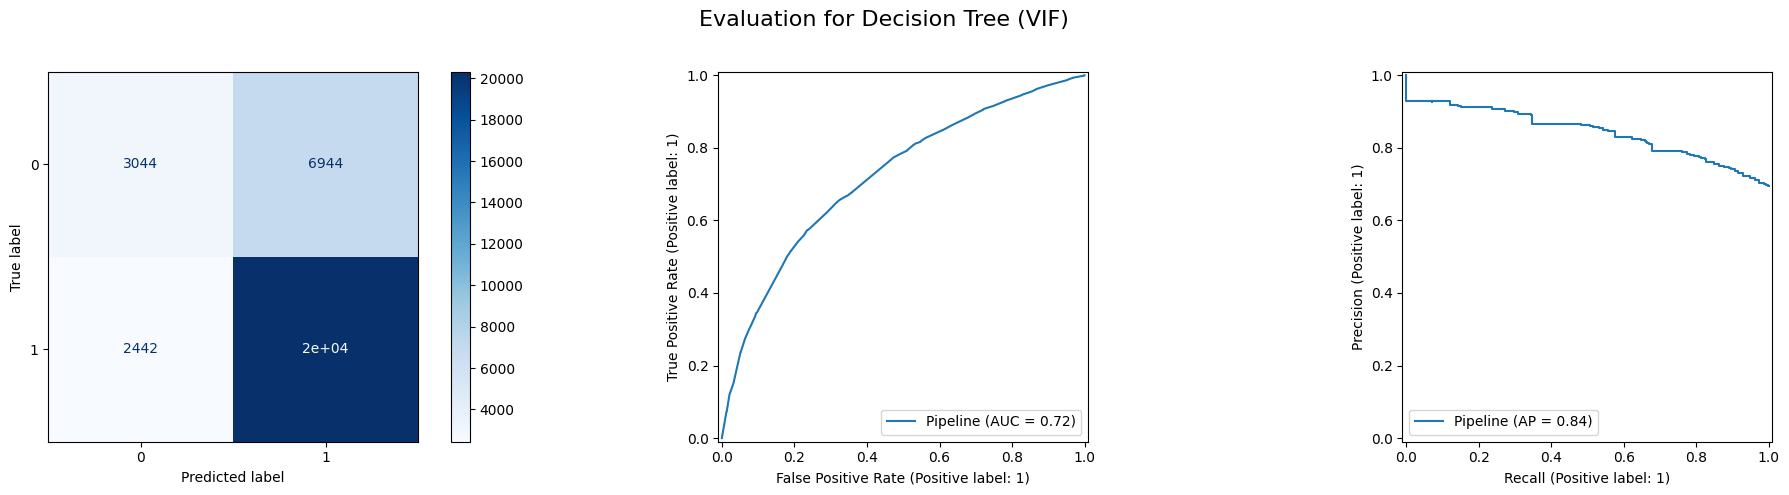


--- Decision Tree Analysis ---


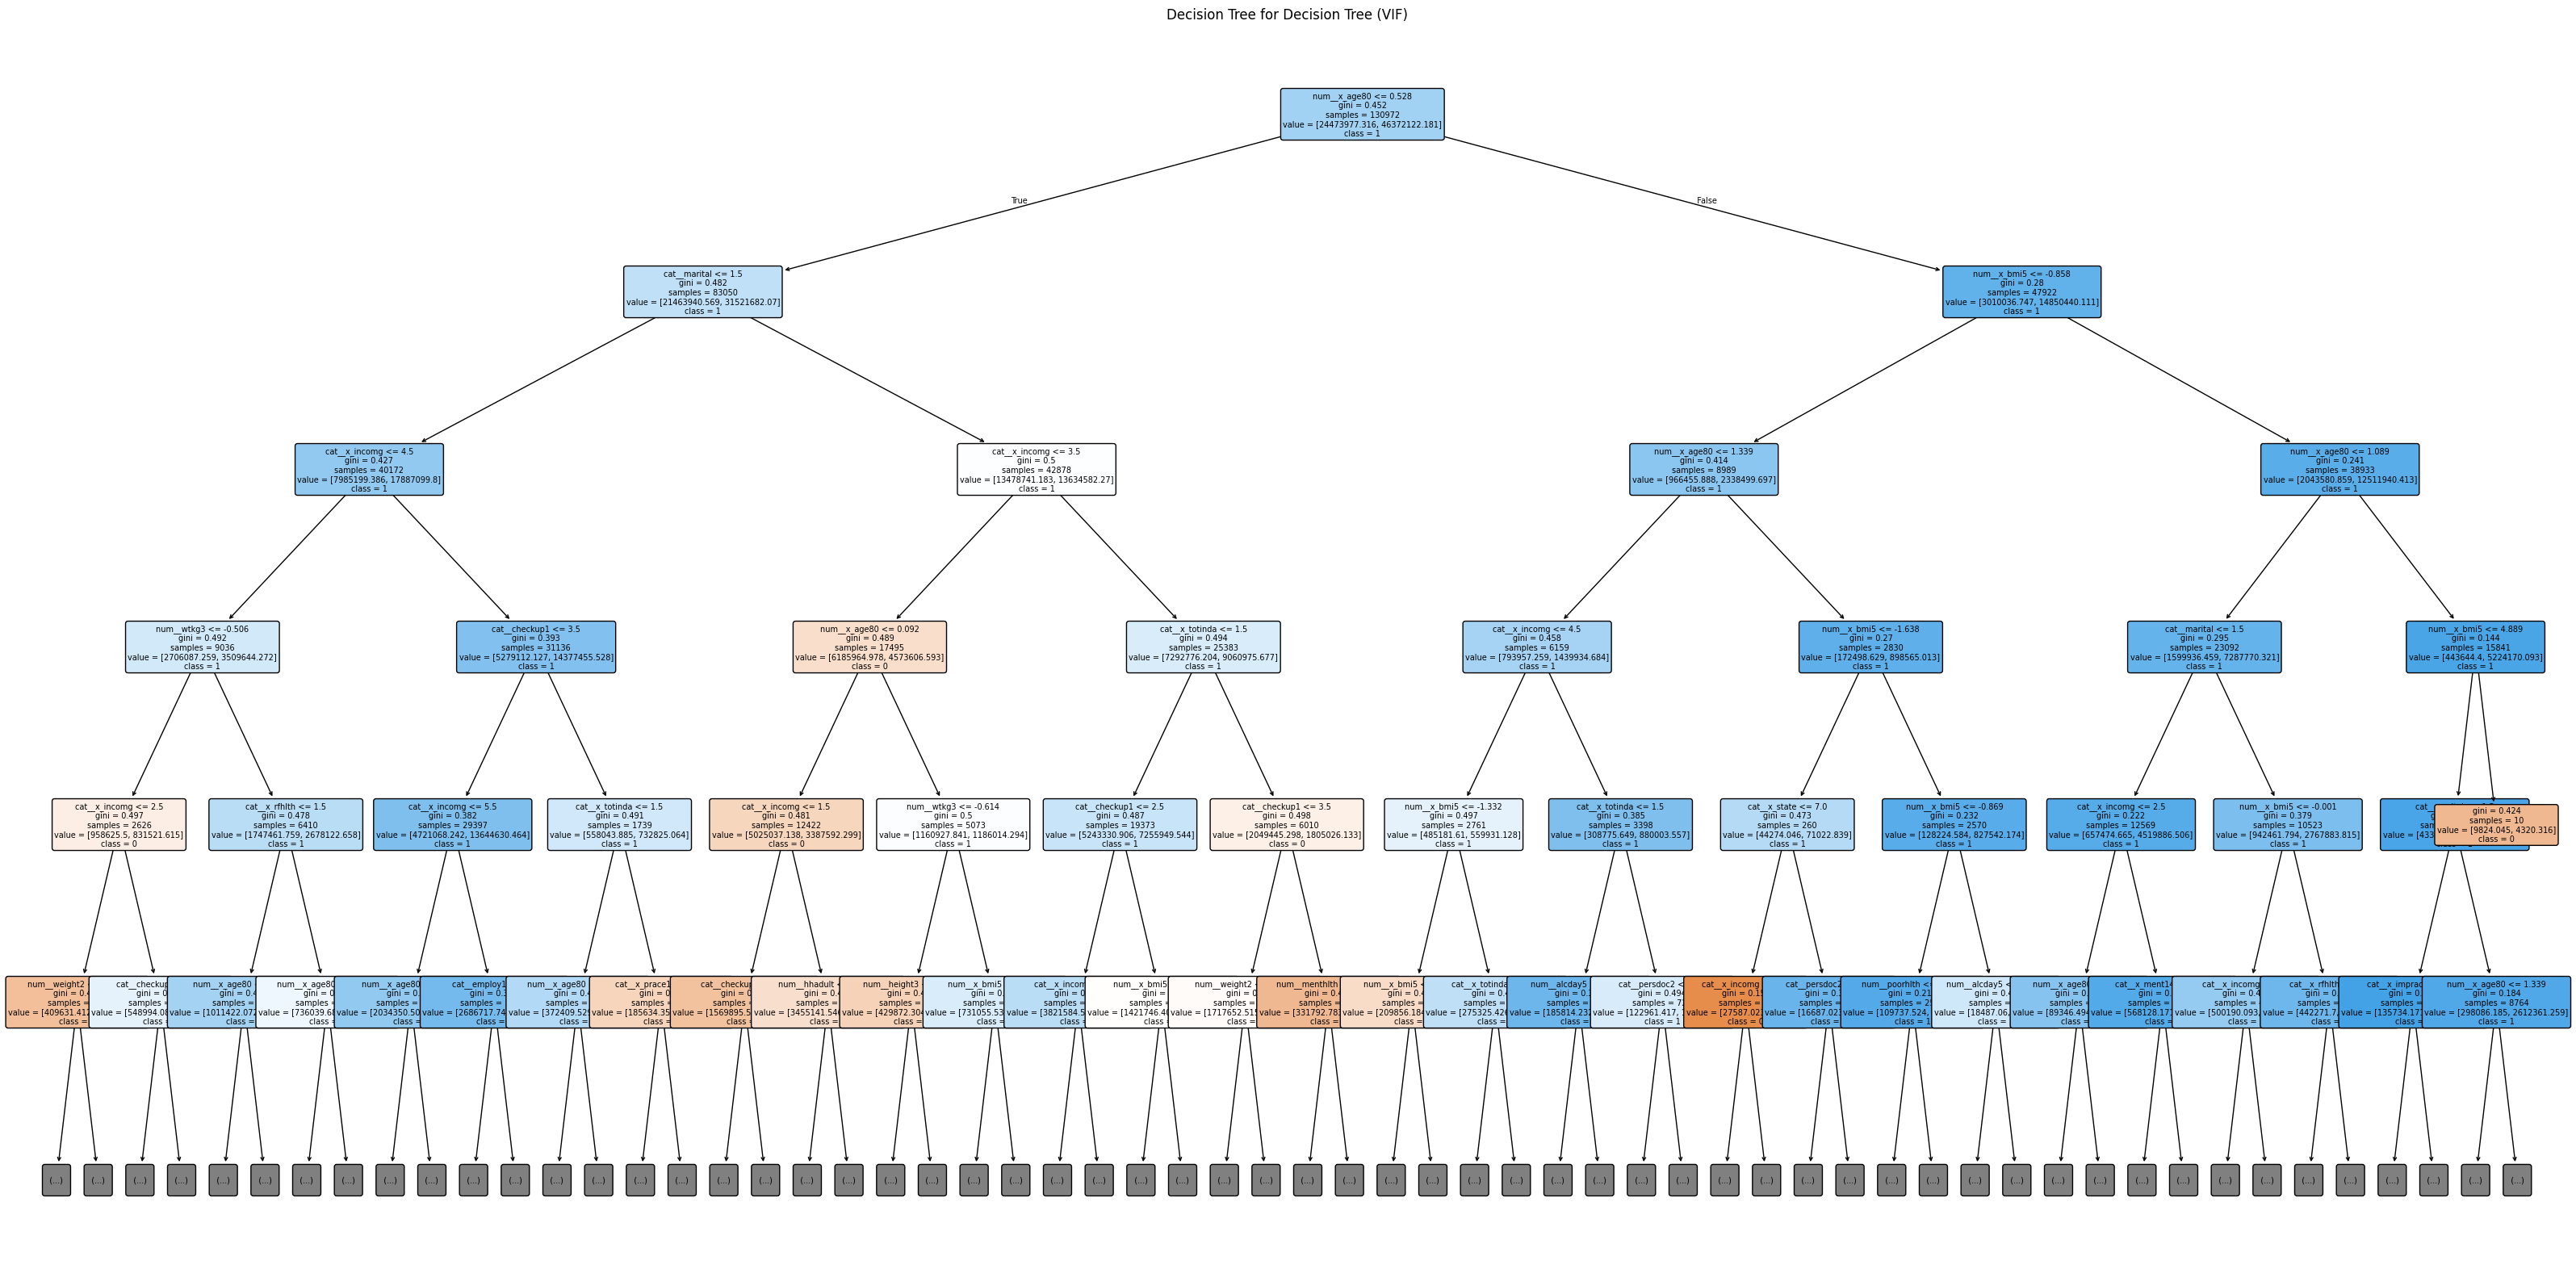

Tree Rules (first few levels):
 |--- num__x_age80 <= 0.53
|   |--- cat__marital <= 1.50
|   |   |--- cat__x_incomg <= 4.50
|   |   |   |--- num__wtkg3 <= -0.51
|   |   |   |   |--- cat__x_incomg <= 2.50
|   |   |   |   |   |--- num__weight2 <= -0.16
|   |   |   |   |   |   |--- cat__x_imprace <= 4.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- cat__x_imprace >  4.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- num__weight2 >  -0.16
|   |   |   |   |   |   |--- cat__persdoc2 <= 2.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- cat__persdoc2 >  2.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- cat__x_incomg >  2.50
|   |   |   |   |   |--- cat__checkup1 <= 2.50
|   |   |   |   |   |   |--- num__alcday5 <= -0.83
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- num__alcday5 >  -0.83

===== Training model: LDA (VIF) =====
Model is LDA, fitting without sample_weight.
Training co

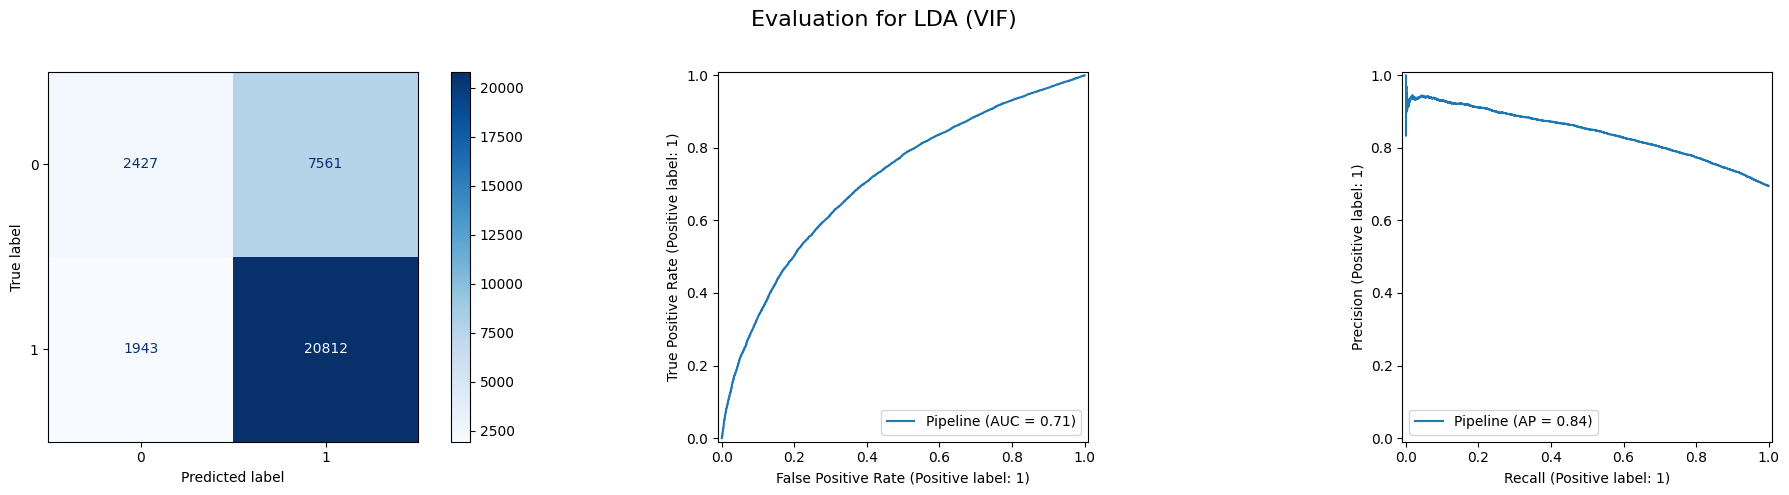


--- Coefficient Analysis ---
           Feature  Coefficient
0     num__x_age80     0.566542
12  cat__x_totinda    -0.315141
22   cat__checkup1    -0.185536
23   cat__x_rfhlth    -0.181359
3       num__wtkg3     0.120513
18   cat__x_incomg     0.114954
17    cat__marital    -0.103563
1      num__x_bmi5     0.101506
7     num__alcday5    -0.067111
5    num__children    -0.052075
13  cat__x_ment14d    -0.051224
4     num__height3     0.041415
6     num__hhadult    -0.034486
15  cat__x_imprace    -0.032972
11  cat__x_casthm1    -0.030277
14  cat__x_phys14d    -0.026921
19    cat__employ1    -0.020636
10   num__poorhlth     0.013015
2     num__weight2    -0.011928
8    num__menthlth    -0.009576
21   cat__persdoc2     0.006013
9    num__physhlth    -0.002503
20    cat__x_state    -0.000765
16   cat__x_prace1    -0.000212


In [133]:
# vif features
print("\nAnalysis with VIF Selected Features")
for name, model_constructor in models_to_run_full_suite.items():
    result = run_full_analysis(f"{name} (VIF)", model_constructor, preprocessor_vif, X_vif, y, weights)
    vif_results.append(result)



Analysis with All Features

===== Training model: XGBoost (All Features) =====
Training completed in 2.66 seconds.
Accuracy: 0.6964 | F1-Score: 0.7061 | AUC: 0.7566


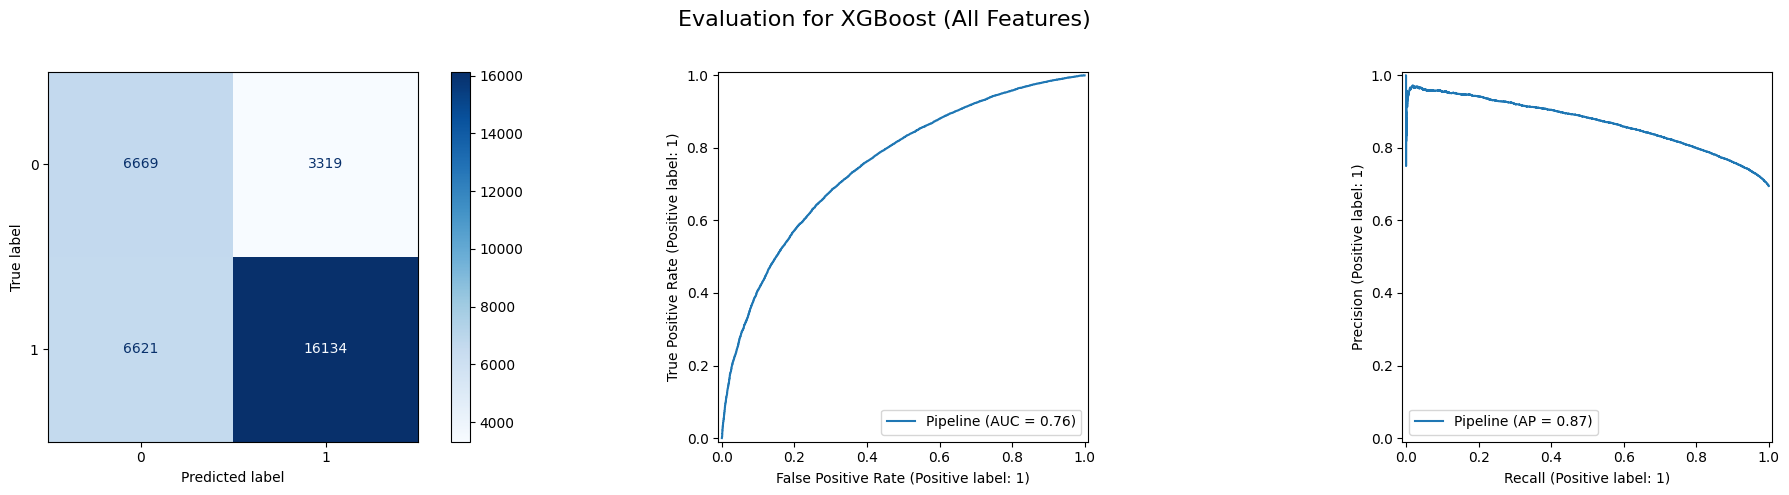


--- SHAP Analysis for XGBoost (All Features) ---


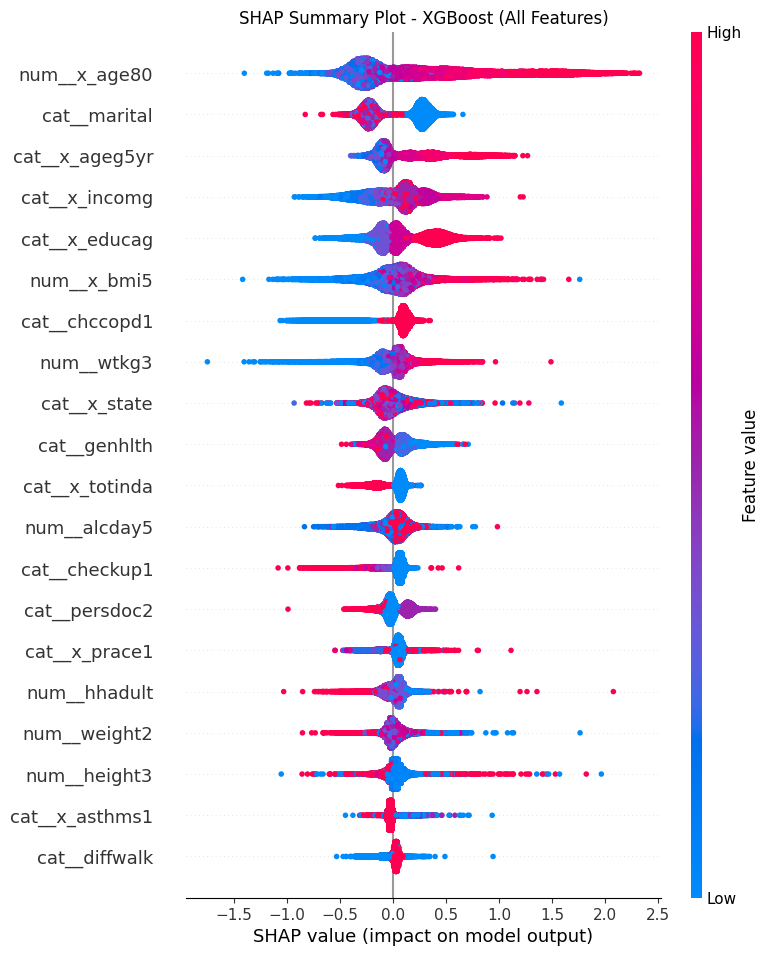


===== Training model: LightGBM (All Features) =====
[LightGBM] [Info] Number of positive: 91019, number of negative: 39953
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.042220 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1336
[LightGBM] [Info] Number of data points in the train set: 130972, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.654547 -> initscore=0.639088
[LightGBM] [Info] Start training from score 0.639088
Training completed in 3.56 seconds.
Accuracy: 0.6935 | F1-Score: 0.7045 | AUC: 0.7681


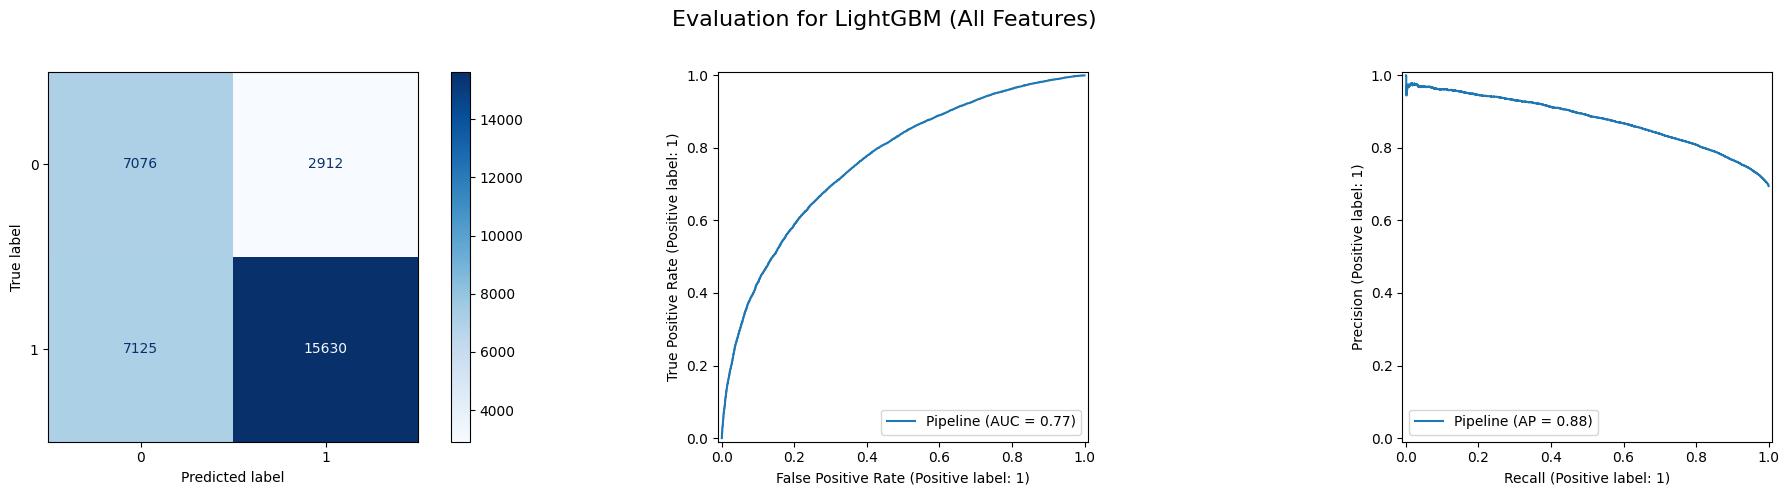


--- SHAP Analysis for LightGBM (All Features) ---


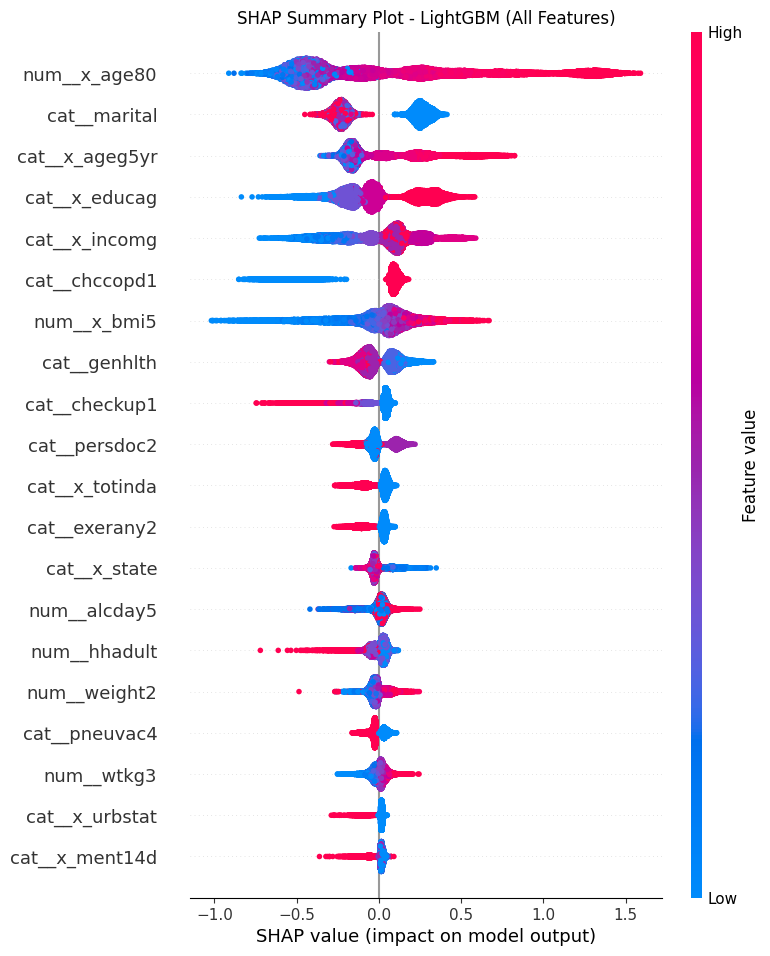


===== Training model: CatBoost (All Features) =====
Training completed in 47.22 seconds.
Accuracy: 0.7029 | F1-Score: 0.7126 | AUC: 0.7673


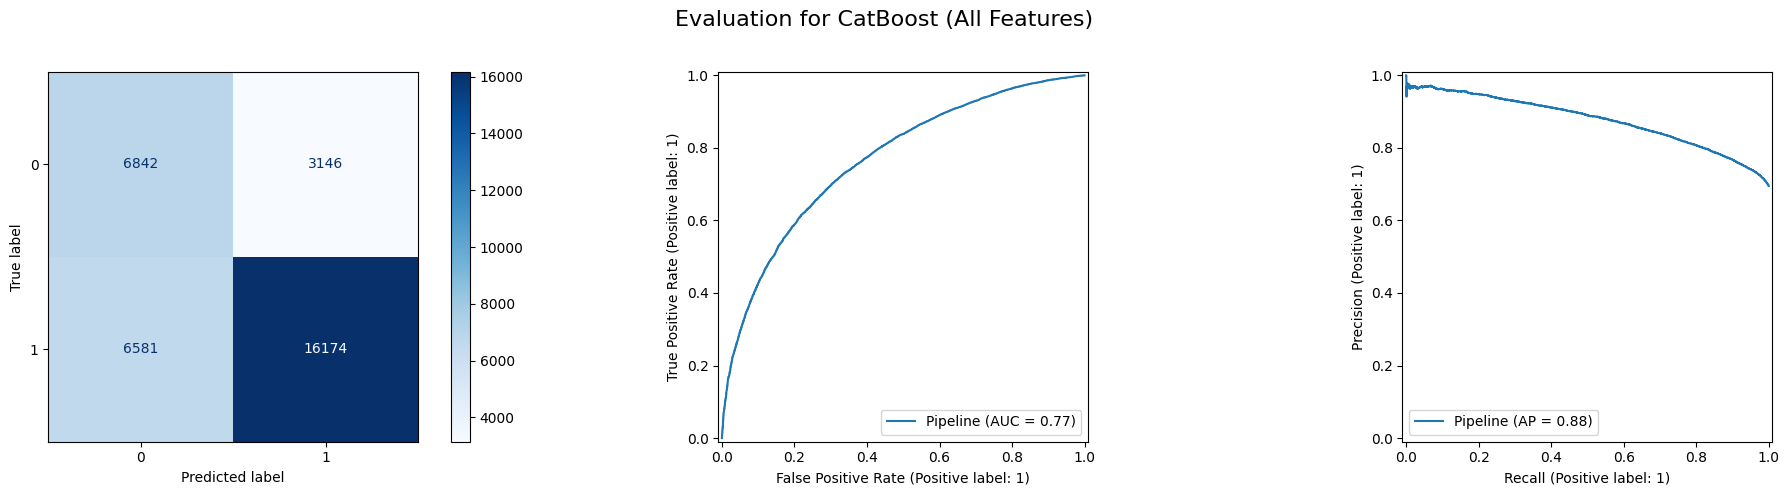


--- SHAP Analysis for CatBoost (All Features) ---


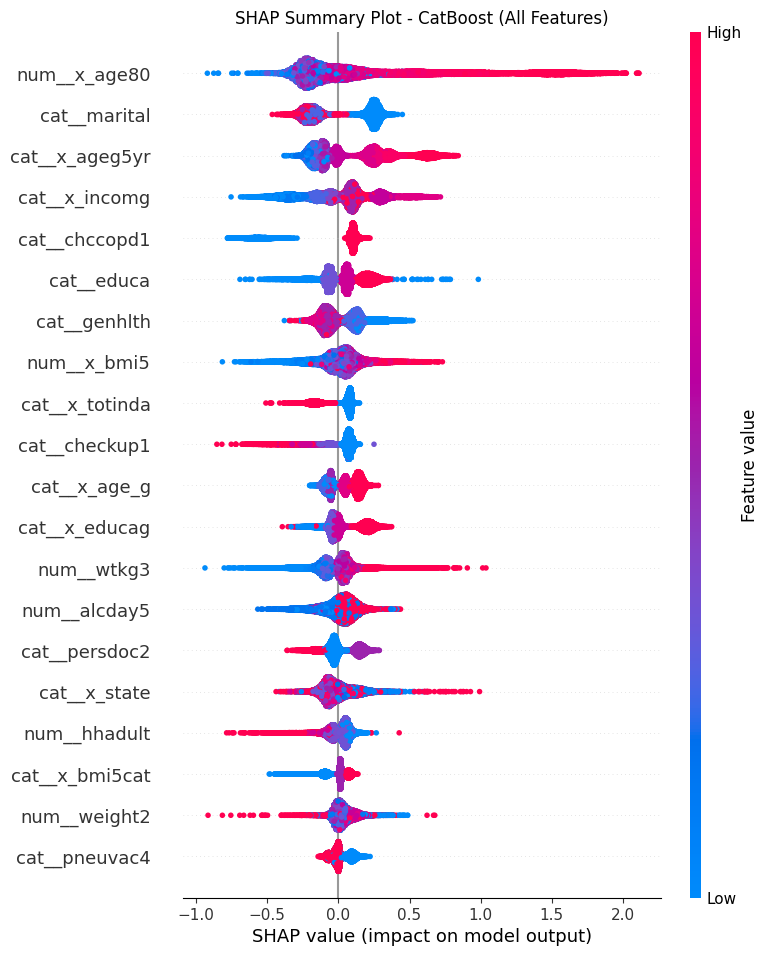


===== Training model: Logistic Regression (All Features) =====
Training completed in 27.99 seconds.
Accuracy: 0.7266 | F1-Score: 0.6932 | AUC: 0.7424


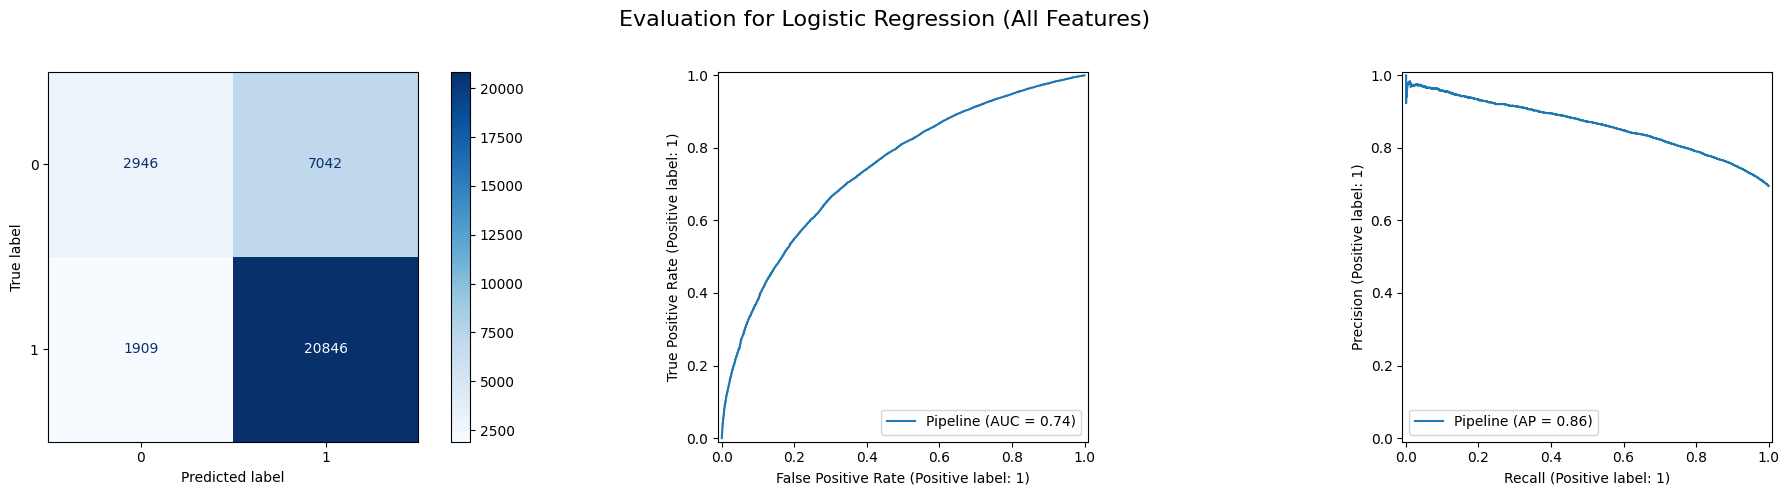


--- Coefficient Analysis ---
           Feature  Coefficient  Odds_Ratio
0     num__x_age80     0.961735    2.616232
39   cat__chccopd1     0.723806    2.062267
13    cat__x_age_g    -0.501053    0.605892
42   cat__chckdny1    -0.408275    0.664796
18   cat__exerany2    -0.270012    0.763370
26      cat__educa     0.235671    1.265758
45   cat__pneuvac4    -0.202424    0.816748
36   cat__cvdcrhd4    -0.162737    0.849814
38    cat__asthma3    -0.152760    0.858336
34   cat__checkup1    -0.142878    0.866860
37   cat__cvdstrk3     0.137838    1.147789
29  cat__x_metstat    -0.129176    0.878819
35   cat__cvdinfr4     0.128732    1.137385
12    cat__genhlth    -0.125852    0.881746
44   cat__diffwalk     0.120995    1.128619
1      num__x_bmi5     0.102588    1.108035
30  cat__x_urbstat    -0.100673    0.904229
27    cat__marital    -0.099412    0.905370
11  cat__x_bmi5cat     0.097899    1.102852
16  cat__x_casthm1    -0.082161    0.921124
21       cat__sex1    -0.081677    0.921570
28

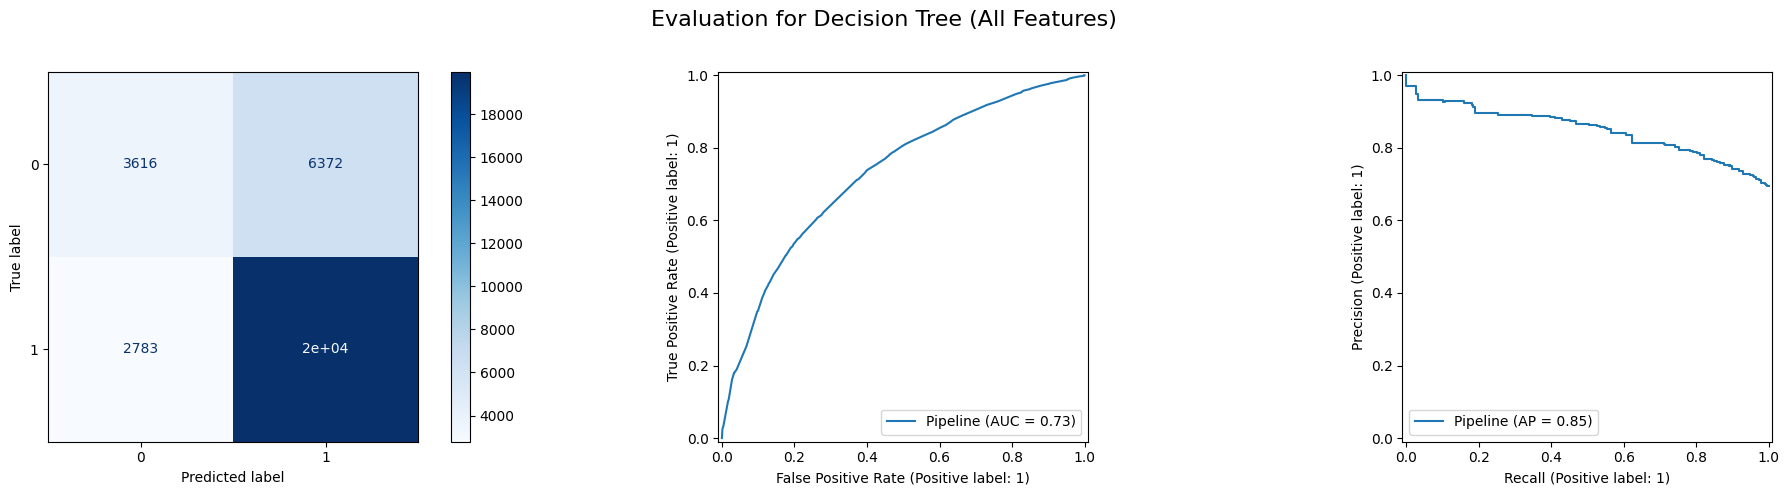


--- Decision Tree Analysis ---


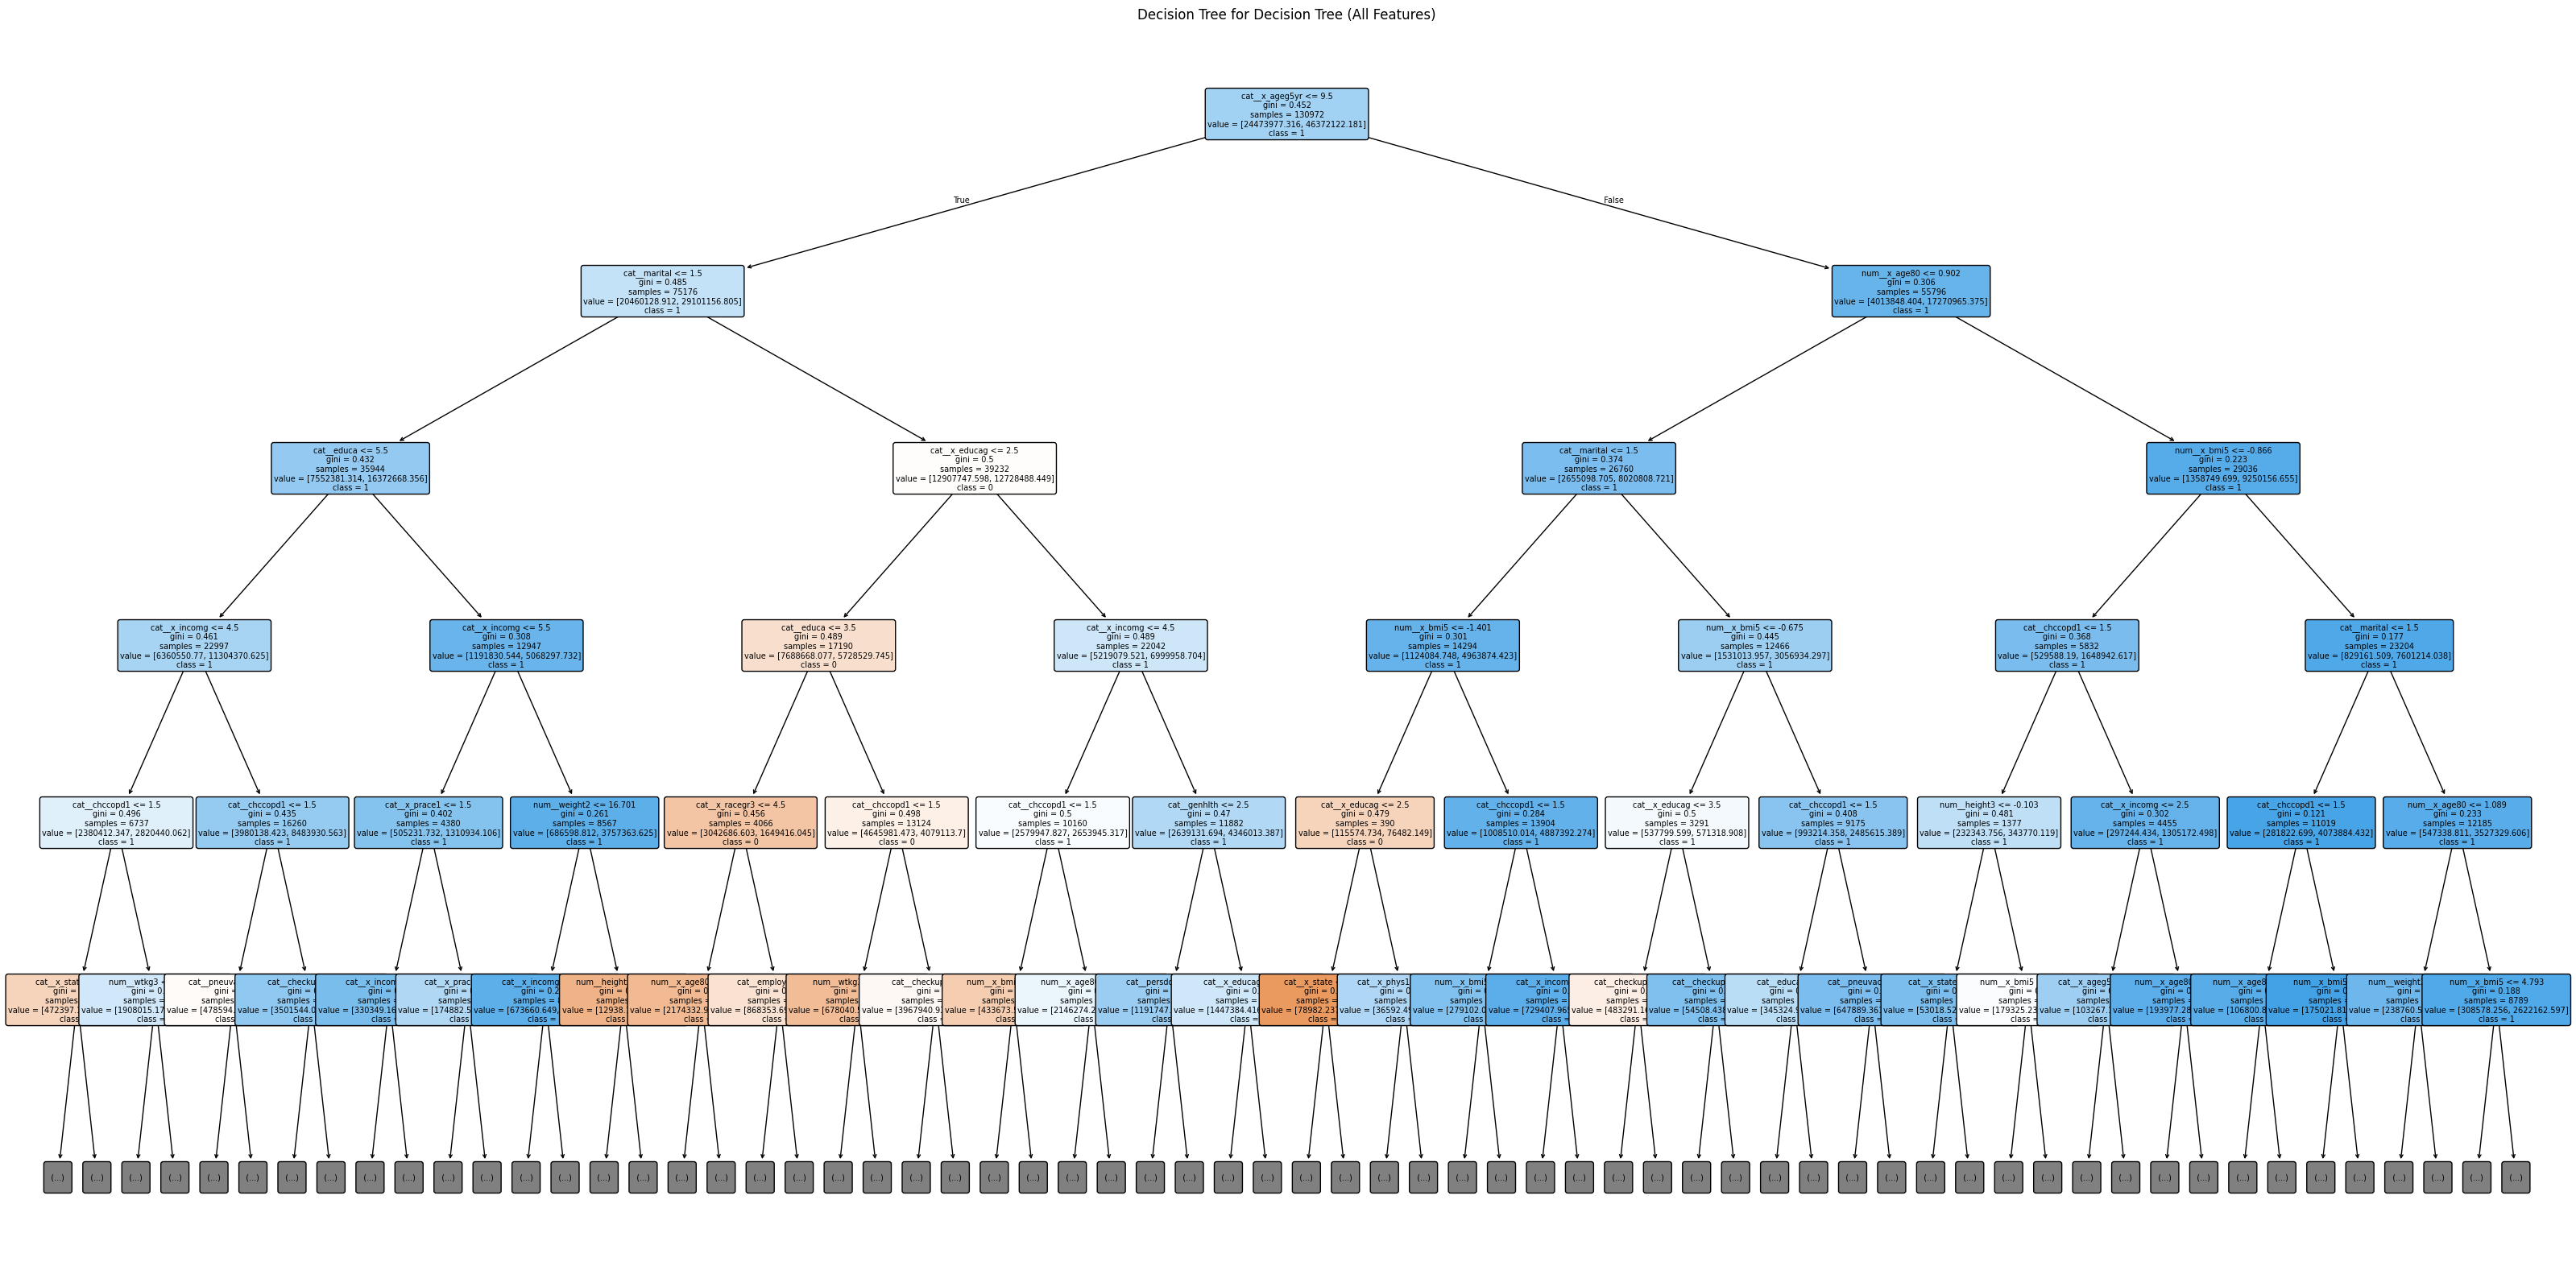

Tree Rules (first few levels):
 |--- cat__x_ageg5yr <= 9.50
|   |--- cat__marital <= 1.50
|   |   |--- cat__educa <= 5.50
|   |   |   |--- cat__x_incomg <= 4.50
|   |   |   |   |--- cat__chccopd1 <= 1.50
|   |   |   |   |   |--- cat__x_state <= 12.50
|   |   |   |   |   |   |--- num__x_age80 <= -0.34
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- num__x_age80 >  -0.34
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- cat__x_state >  12.50
|   |   |   |   |   |   |--- cat__educa <= 3.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- cat__educa >  3.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- cat__chccopd1 >  1.50
|   |   |   |   |   |--- num__wtkg3 <= -0.46
|   |   |   |   |   |   |--- cat__x_incomg <= 2.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- cat__x_incomg >  2.50

===== Training model: LDA (All Features) =====
Model is LDA, fitting without sample_weight.
Training co

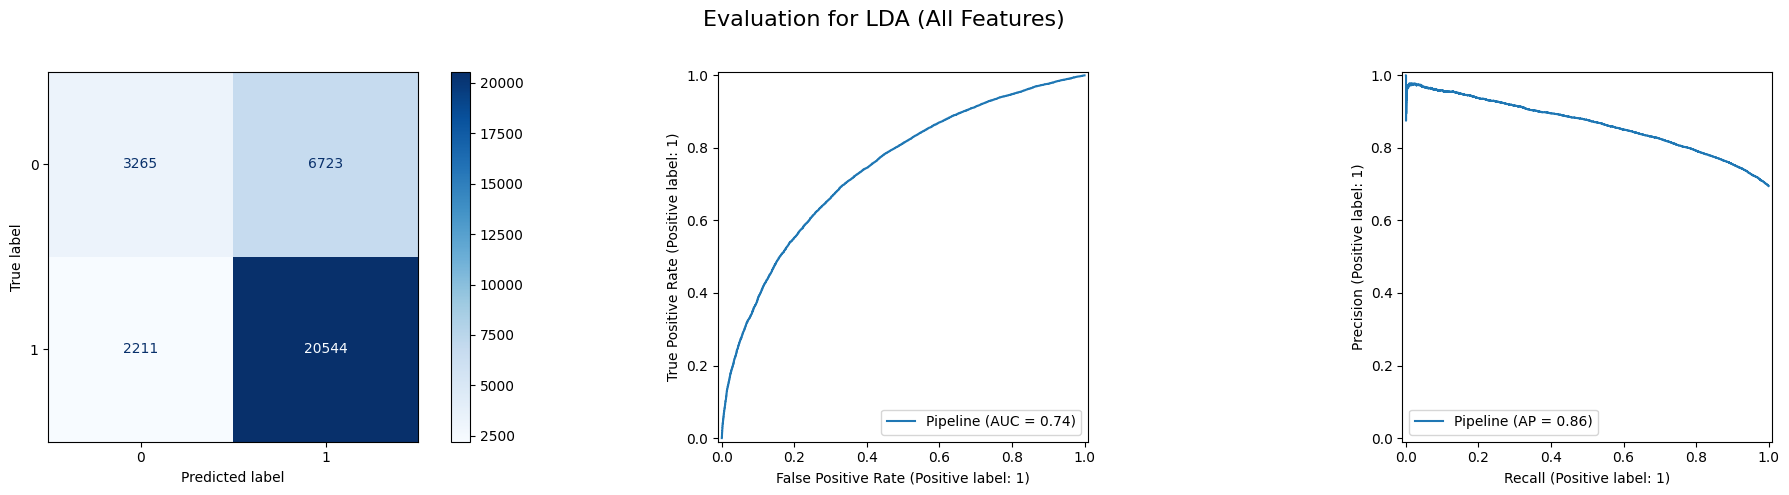


--- Coefficient Analysis ---
           Feature  Coefficient
0     num__x_age80     1.059404
39   cat__chccopd1     0.740209
13    cat__x_age_g    -0.506780
18   cat__exerany2    -0.317799
26      cat__educa     0.249935
38    cat__asthma3    -0.249193
42   cat__chckdny1    -0.243720
45   cat__pneuvac4    -0.197142
36   cat__cvdcrhd4    -0.196260
37   cat__cvdstrk3     0.188934
34   cat__checkup1    -0.174410
12    cat__genhlth    -0.170387
11  cat__x_bmi5cat     0.131699
44   cat__diffwalk     0.129628
41   cat__addepev2     0.114439
1      num__x_bmi5     0.112273
27    cat__marital    -0.110589
35   cat__cvdinfr4     0.107417
30  cat__x_urbstat    -0.099665
29  cat__x_metstat    -0.083119
28   cat__x_incomg     0.081089
16  cat__x_casthm1    -0.073427
3       num__wtkg3     0.064481
47  cat__x_ageg5yr     0.060367
21       cat__sex1    -0.058607
4     num__height3     0.056346
15  cat__x_ltasth1     0.054842
46   cat__x_rfhlth     0.054145
14  cat__x_asthms1     0.038881
25   cat__

In [134]:
# all features
print("\nAnalysis with All Features")
for name, model_constructor in models_to_run_full_suite.items():
    result = run_full_analysis(f"{name} (All Features)", model_constructor, preprocessor, X, y, weights)
    all_features_results.append(result)


In [135]:
# Compare results
print("\nFinal Comparison Table")
vif_df = pd.DataFrame(vif_results)
all_df = pd.DataFrame(all_features_results)
final_results = pd.concat([vif_df, all_df]).set_index('Model')
print(final_results.sort_values(by='AUC', ascending=False))



Final Comparison Table
                                    Accuracy  F1-Score       AUC   Time (s)
Model                                                                      
LightGBM (All Features)             0.693461  0.704520  0.768061   3.560350
CatBoost (All Features)             0.702929  0.712596  0.767313  47.216603
XGBoost (All Features)              0.696424  0.706080  0.756582   2.656729
LightGBM (VIF)                      0.676206  0.688598  0.752126   2.283390
CatBoost (VIF)                      0.684024  0.695353  0.749863  41.561599
LDA (All Features)                  0.727148  0.699648  0.744648   1.422824
Logistic Regression (All Features)  0.726629  0.693214  0.742398  27.989359
XGBoost (VIF)                       0.677336  0.688591  0.737202   3.052280
Decision Tree (All Features)        0.720398  0.699999  0.730286   1.247093
Decision Tree (VIF)                 0.713343  0.684546  0.721097   0.876543
LDA (VIF)                           0.709739  0.668900  0.711487

In [ ]:
final_results.to_csv("final2022.csv")


### PCA

چه کاری انجام می‌دهد؟ PCA ویژگی‌های اولیه شما را به مجموعه‌ای جدید از ویژگی‌های ناهمبسته تبدیل می‌کند و همزمان می‌تواند ابعاد داده را کاهش دهد.

کِی باید استفاده کرد؟ زمانی که قصد دارید از مدل‌های حساس به هم‌خطی (مانند رگرسیون لجستیک) استفاده کنید و رفع هم‌خطی برای شما یک اولویت است.

ویژگی‌های جدید (مؤلفه‌های اصلی) دیگر به راحتی قابل تفسیر نیستند.

یک عیب PCA این است که مؤلفه‌های اصلی جدید، ترکیبی خطی از ویژگی‌های اولیه هستند و دیگر به راحتی قابل تفسیر نیستند. برای مثال، PC1 ممکن است چیزی شبیه به (0.4 * سن) - (0.6 * BMI) + (0.7 * درآمد) باشد. بنابراین، اگر هدف اصلی شما تفسیر ضرایب تک تک ویژگی‌های اولیه باشد، PCA بهترین انتخاب نیست.

In [138]:
pca_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_vif),
    ('pca', PCA(n_components=0.95)),  # n_components: تعداد مؤلفه‌ها
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])


X_train, X_test, y_train, y_test, weights_train, weights_test = train_test_split(
    X_vif, y, weights, test_size=0.2, random_state=42, stratify=y
)

# ۴. آموزش پایپ‌لاین با استفاده از وزن‌ها (sample_weight)
print("\nآموزش پایپ‌لاین PCA + Logistic Regression با وزن‌های نمونه...")
pca_pipeline.fit(X_train, y_train, classifier__sample_weight=weights_train)
print("آموزش کامل شد.")

# ۵. بررسی نتایج PCA
# می‌توانیم ببینیم PCA چند مؤلفه را انتخاب کرده است
num_components = pca_pipeline.named_steps['pca'].n_components_
print(f"\nتعداد مؤلفه‌های اصلی انتخاب شده توسط PCA (برای حفظ ۹۵٪ واریانس): {num_components}")

# ۶. ارزیابی مدل نهایی
y_pred_pca_lr = pca_pipeline.predict(X_test)

print("\n--- نتایج مدل Logistic Regression پس از PCA ---")
print(f"دقت (Accuracy): {accuracy_score(y_test, y_pred_pca_lr):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_pca_lr))



آموزش پایپ‌لاین PCA + Logistic Regression با وزن‌های نمونه...
آموزش کامل شد.

تعداد مؤلفه‌های اصلی انتخاب شده توسط PCA (برای حفظ ۹۵٪ واریانس): 3

--- نتایج مدل Logistic Regression پس از PCA ---
دقت (Accuracy): 0.6950

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      9988
           1       0.69      1.00      0.82     22755

    accuracy                           0.69     32743
   macro avg       0.35      0.50      0.41     32743
weighted avg       0.48      0.69      0.57     32743

